<a href="https://www.kaggle.com/code/sohanamitarathod/credit-risk-analysis-ml-project-cra1?scriptVersionId=141459987" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [558]:
#import numpy,matplotlib,pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [559]:
import pandas as pd

# Load the dataset
dataset_path = '/kaggle/input/loan-data-for-credit-risk-modeling/loan_data_2007_2014.csv'
LoadDataset = pd.read_csv(dataset_path)

#create a copy of original dataset so that orginal dataframe is not disturbed
Load_DS=LoadDataset.copy()

Load_DS
#print the basic info of the dataframe
Load_DS.info()

/tmp/ipykernel_32/2304388616.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  LoadDataset = pd.read_csv(dataset_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# PRE-PROCESING

In [560]:
#check the emp-length column unique values
# Check unique values in the emp_length column
emp_length_unique = Load_DS['emp_length'].unique()
print(emp_length_unique)

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [561]:
#replace all the extra letters and convert this column into numeric format
#one-sample conversion code is written write for the rest

In [562]:
# Instead we do mapping.....

# Define a mapping for employment length categories
emp_length_mapping = {
    '10+ years': 10,
    '< 1 year': 0.5,  # Assigning a value between 0 and 1 for less than 1 year
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
}

# Apply the mapping to the emp_length column
Load_DS['emp_length_int'] = Load_DS['emp_length'].map(emp_length_mapping)

# Display the modified DataFrame
print(Load_DS[['emp_length', 'emp_length_int']])


       emp_length  emp_length_int
0       10+ years            10.0
1        < 1 year             0.5
2       10+ years            10.0
3       10+ years            10.0
4          1 year             1.0
...           ...             ...
466280    4 years             4.0
466281  10+ years            10.0
466282    7 years             7.0
466283    3 years             3.0
466284  10+ years            10.0

[466285 rows x 2 columns]


In [563]:
#check the type of emp_length_int
type(Load_DS['emp_length_int'][0])

numpy.float64

In [564]:
#convert it into numrical format
Load_DS['emp_length_int'] =  pd.to_numeric(Load_DS['emp_length_int'])

In [565]:
#check the type of emp_length_int
type(Load_DS['emp_length_int'][0])

numpy.float64

In [566]:
#print the dataframe
Load_DS

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN,4.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN,10.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN,7.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN,3.0


In [567]:
#repeating the similar steps as we have done for previous column emp_length
#check the unique values of term column

# Check unique values in the term column
term_unique = Load_DS['term'].unique()
print(term_unique)

[' 36 months' ' 60 months']


In [568]:
#do all the necesaary replacements to convert into numeric
Load_DS['term_int']=Load_DS['term'].str.replace('months','')

In [569]:
#check the type of term_int
type(Load_DS['term_int'][0])

str

In [570]:
#convert it into numrical format
Load_DS['term_int'] = Load_DS['term'].str.replace('months', '').astype(int)

In [571]:
#check he type
type(Load_DS['term_int'][0])

numpy.int64

In [572]:
#check for the column called earliest_cr_line
# Check unique values in the earliest_cr_line column

earliest_cr_line_unique = Load_DS['earliest_cr_line'].unique()
print(earliest_cr_line_unique)


['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Jan-96' 'Nov-04' 'Jul-05' 'Jan-07'
 'Apr-04' 'Sep-04' 'Jan-98' 'Oct-89' 'Jul-03' 'May-91' 'Sep-07' 'Oct-98'
 'Aug-93' 'Oct-03' 'Jan-01' 'Nov-97' 'Feb-83' 'Jul-85' 'Apr-03' 'Jun-01'
 'Feb-02' 'Aug-84' 'Nov-06' 'Dec-87' 'Nov-81' 'Feb-97' 'Apr-05' 'Oct-07'
 'Dec-00' 'Apr-07' 'Dec-01' 'Jan-03' 'Mar-94' 'Sep-98' 'Jun-04' 'Nov-95'
 'Jul-99' 'Jun-95' 'Sep-92' 'Jan-02' 'Apr-92' 'Oct-06' 'May-00' 'Dec-98'
 'Dec-04' 'Oct-00' 'May-02' 'May-06' 'Jul-02' 'Jul-06' 'May-97' 'Oct-05'
 'Apr-95' 'Oct-02' 'Jan-00' 'Apr-00' 'Dec-94' 'Sep-05' 'Dec-84' 'Dec-99'
 'Nov-03' 'Jun-89' 'Jun-03' 'Oct-96' 'May-03' 'Jun-02' 'Jun-07' 'Dec-96'
 'Feb-84' 'Sep-02' 'Jan-86' 'May-98' 'Jan-97' 'Jun-05' 'Feb-90' 'Mar-04'
 'Jul-95' 'Aug-94' 'Jun-92' 'Mar-97' 'Apr-06' 'Apr-90' 'Aug-99' 'Sep-00'
 'Feb-01' 'Dec-88' 'Feb-99' 'Dec-91' 'Aug-00' 'Oct-04' 'Aug-04' 'Feb-05'
 'Nov-05' 'Nov-00' 'May-07' 'Jan-91' 'Jun-00' 'Aug-06' 'Dec-02' 'Jun-93'
 'Jun-06' 'Feb-04' 'Dec-90' 'Mar-00' 'Feb-95' 'Jul-

In [573]:
#convert into datetime
Load_DS['earliest_cr_line_date']=pd.to_datetime(Load_DS['earliest_cr_line'], format='%b-%y')

In [574]:
#check the newly created column i.e 'earliest_cr_line_date'
earliest_cr_line_date_unique = Load_DS['earliest_cr_line_date'].unique()
print(earliest_cr_line_date_unique)


['1985-01-01T00:00:00.000000000' '1999-04-01T00:00:00.000000000'
 '2001-11-01T00:00:00.000000000' '1996-02-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '2004-11-01T00:00:00.000000000'
 '2005-07-01T00:00:00.000000000' '2007-01-01T00:00:00.000000000'
 '2004-04-01T00:00:00.000000000' '2004-09-01T00:00:00.000000000'
 '1998-01-01T00:00:00.000000000' '1989-10-01T00:00:00.000000000'
 '2003-07-01T00:00:00.000000000' '1991-05-01T00:00:00.000000000'
 '2007-09-01T00:00:00.000000000' '1998-10-01T00:00:00.000000000'
 '1993-08-01T00:00:00.000000000' '2003-10-01T00:00:00.000000000'
 '2001-01-01T00:00:00.000000000' '1997-11-01T00:00:00.000000000'
 '1983-02-01T00:00:00.000000000' '1985-07-01T00:00:00.000000000'
 '2003-04-01T00:00:00.000000000' '2001-06-01T00:00:00.000000000'
 '2002-02-01T00:00:00.000000000' '1984-08-01T00:00:00.000000000'
 '2006-11-01T00:00:00.000000000' '1987-12-01T00:00:00.000000000'
 '1981-11-01T00:00:00.000000000' '1997-02-01T00:00:00.000000000'
 '2005-04-01T00:00:00.000

In [575]:
#get the total number of days from current date i.e present date
pd.to_datetime('2019-12-01')-Load_DS['earliest_cr_line_date']

0        12752 days
1         7549 days
2         6604 days
3         8704 days
4         8735 days
            ...    
466280    6088 days
466281    8218 days
466282    6574 days
466283    6147 days
466284    7243 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [576]:
#convert these days into months i.e converting days into months
Load_DS['mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2019-12-01')-Load_DS['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [577]:
# Check the basic statistics of 'mths_since_earliest_cr_line'
statistics = Load_DS['mths_since_earliest_cr_line'].describe()
print(statistics)

count    466256.000000
mean        263.482430
std          93.974829
min        -588.000000
25%         207.000000
50%         249.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64


In [578]:
#check the dataframe for column that have negitive months which is not possible
Load_DS.loc[: , ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][Load_DS['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-513.0
1770,Sep-68,2068-09-01,-585.0
2799,Sep-64,2064-09-01,-537.0
3282,Sep-67,2067-09-01,-573.0
3359,Feb-65,2065-02-01,-542.0
...,...,...,...
464003,Jan-68,2068-01-01,-577.0
464260,Jul-66,2066-07-01,-559.0
465100,Oct-67,2067-10-01,-574.0
465500,Sep-67,2067-09-01,-573.0


In [579]:
#replace all the negitive values  with the max months value
# Replace negative values with the maximum months value
max_months_value = Load_DS['mths_since_earliest_cr_line'].max()
Load_DS.loc[Load_DS['mths_since_earliest_cr_line'] < 0, 'mths_since_earliest_cr_line'] = max_months_value


In [580]:
#again check the basic stats so that no months are negitive
statistics = Load_DS['mths_since_earliest_cr_line'].describe()
print(statistics)

count    466256.000000
mean        266.385374
std          86.460310
min          97.000000
25%         208.000000
50%         250.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64


In [581]:
# Check unique values in the issue_d column
issue_d_unique = Load_DS['issue_d'].unique()
print(issue_d_unique)


['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07' 'Dec-13'
 'Nov-13' 'Oct-13' 'Sep-13' 'Aug-13' 'Jul-13' 'Jun-13' 'May-13' 'Apr-13'
 'Mar-13' 'Feb-13' 'Jan-13' 'Dec-12' 'Nov-12' 'Oct-12' 'Sep-12' 'Aug-12'
 'Jul-12' 'Jun-12' 'May-12' 'Apr-12' 'Mar-12' 'Feb-12' 'Jan-12' 'Dec-14'
 'Nov-14' 'Oct-14' 'Sep-14' 'Aug-14' 'Jul-14' 'Jun-14' 'May-14' 'Apr-14'
 'Mar-14' 'Feb-14' 'Jan-14']


In [582]:
#repeat the similar steps as we have done for 'earliest_cr_line'


#convert into date_time format
Load_DS['issue_date'] = pd.to_datetime(Load_DS['issue_d'], format='%b-%y')

In [583]:
#get the number of days from present date
from datetime import datetime

# Get the present date
present_date = datetime.now()

# Calculate the difference in days
Load_DS['days_since_issue'] = (present_date - Load_DS['issue_date']).dt.days

# Display the DataFrame with the new column
print(Load_DS[['issue_date', 'days_since_issue']])


       issue_date  days_since_issue
0      2011-12-01              4283
1      2011-12-01              4283
2      2011-12-01              4283
3      2011-12-01              4283
4      2011-12-01              4283
...           ...               ...
466280 2014-01-01              3521
466281 2014-01-01              3521
466282 2014-01-01              3521
466283 2014-01-01              3521
466284 2014-01-01              3521

[466285 rows x 2 columns]


In [584]:
#convert days to months
Load_DS['mths_since_issued_date']=round(pd.to_numeric((pd.to_datetime('2019-12-01')-Load_DS['issue_date'])/np.timedelta64(1,'M')))

In [585]:
#check the basic stats
# Check basic statistics of the mths_since_issued_date column
statistics_issued_date = Load_DS['mths_since_issued_date'].describe()
print(statistics_issued_date)


count    466285.000000
mean         75.255187
std          14.340154
min          60.000000
25%          65.000000
50%          71.000000
75%          81.000000
max         150.000000
Name: mths_since_issued_date, dtype: float64


In [586]:
#check the 'delinq_2yrs' column and convert it into float type
# Check unique values in the delinq_2yrs column
delinq_2yrs_unique = Load_DS['delinq_2yrs'].unique()
print(delinq_2yrs_unique)

# Convert the delinq_2yrs column to float data type
Load_DS['delinq_2yrs'] = Load_DS['delinq_2yrs'].astype(float)


[ 0.  2.  3.  1.  4.  6.  5.  8.  7.  9. 11. nan 13. 15. 10. 12. 17. 18.
 29. 24. 14. 21. 22. 19. 16.]


In [587]:
#check the basic stats
# Check basic statistics of the delinq_2yrs column
statistics_delinq_2yrs = Load_DS['delinq_2yrs'].describe()
print(statistics_delinq_2yrs)


count    466256.000000
mean          0.284678
std           0.797365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64


## PREPROCESSING MISSING DATA

In [588]:
Load_DS['grade']

0         B
1         C
2         C
3         C
4         B
         ..
466280    C
466281    D
466282    D
466283    A
466284    D
Name: grade, Length: 466285, dtype: object

In [589]:
#Get the dummies value for the column 'grade',,,apply a (prefix='grade') and (prefix_sep=":")
pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [590]:
#Similarly apply the dummy creation step for 'grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status' in one list_comprehension
Load_dumies_Data=[pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                 pd.get_dummies(Load_DS['verification_status'],prefix='verification_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['loan_status'],prefix='loan_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['purpose'],prefix='purpose',prefix_sep=':'),
                 pd.get_dummies(Load_DS['addr_state'],prefix='addr_state',prefix_sep=':'),
                 pd.get_dummies(Load_DS['initial_list_status'],prefix='initial_list_status',prefix_sep=':')]
                 

In [591]:
#concat all and create a dataframe
Load_dumies_Data=pd.concat(Load_dumies_Data, axis=1)

In [592]:
#check the dummy var dataframe
Load_dumies_Data

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466282,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [593]:
#conact this dummy var dataframe with the original Load_DS dataframe
Load_DS=pd.concat([Load_DS,Load_dumies_Data], axis=1)

In [594]:
#check the column names
Load_DS.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=208)

## MISSING VALUES HANDLING

In [595]:
#check the missing values
Load_DS.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 208, dtype: int64

In [596]:
pd.options.display.max_rows= None

In [597]:
#print the sum of all null values of all columns
Load_DS.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [598]:
pd.options.display.max_rows =100

In [599]:
#fill the null values in column 'total_rev_hi_lim' with Loan_DS['funded_amt']
# total revolving high credit limit

Load_DS['total_rev_hi_lim'].fillna(Load_DS['funded_amnt'], inplace=True)


In [600]:
#check the null values in column 'total_rev_hi_lim'
Load_DS['total_rev_hi_lim'].isnull().sum()

0

In [601]:
#Fill the 'annual_inc' null values with mean value of 'annual_inc' column

# Calculate the mean value of the annual_inc column
mean_annual_inc = Load_DS['annual_inc'].mean()

# Fill null values in annual_inc column with the mean value
Load_DS['annual_inc'].fillna(mean_annual_inc, inplace=True)


In [602]:
#check the null values in 'annual_inc'
Load_DS['annual_inc'].isnull().sum()

0

In [603]:
#fill all null values in column 'mths_since_earliest_cr_line' with '0'
# Fill null values in mths_since_earliest_cr_line column with 0
Load_DS['mths_since_earliest_cr_line'].fillna(0, inplace=True)


In [604]:
#check the sum of null values for this column
Load_DS['mths_since_earliest_cr_line'].isnull().sum()

0

In [605]:
#fill all null values in column 'acc_now_delinq' with '0'
# Fill null values in acc_now_delinq column with 0
Load_DS['acc_now_delinq'].fillna(0, inplace=True)

In [606]:
#check the sum of null values for this column
Load_DS['acc_now_delinq'].isnull().sum()

0

In [607]:
#fill all null values in column 'total_Acc' with '0'
#total number of credit lines currently in the borrower's credit file

Load_DS['total_acc'].fillna(0, inplace=True)

In [608]:
#similary fill the columns 'pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int' with '0'
Load_DS['pub_rec'].fillna('0',inplace=True)
Load_DS['open_acc'].fillna('0',inplace=True)
Load_DS['inq_last_6mths'].fillna('0',inplace=True)
Load_DS['delinq_2yrs'].fillna('0',inplace=True)
Load_DS['emp_length_int'].fillna('0',inplace=True)

# PD (PROBABLITY OF DEFAULT)

Building the Weight of Expetency (WOE) values

In [609]:
#check the unique values in our final output column i.e 'loan_status'
Load_DS['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [610]:
#chekc the value_counts for loan_status
Load_DS['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [611]:
#check the percentage of distribution
#Load_DS['loan_status'].value_counts()/Load_DS['loan_status'].count()

# Calculate the percentage distribution of each loan status
Load_DS['loan_status'].value_counts() / len(Load_DS) * 100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

### Binary Encoding of loan_status 

If a value in the 'loan_status' column matches any of the specified statuses, the corresponding entry in the 'good_bad' column is set to 0 (indicating a 'bad' loan). If the value doesn't match any of the specified statuses, the corresponding entry in the 'good_bad' column is set to 1 (indicating a 'good' loan).

In [612]:
#binary encoding of our target variable
Load_DS['good_bad']=np.where(Load_DS['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']),0,1)

In [613]:
Load_DS['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

In [614]:
import warnings

In [615]:
#import train-test split
from sklearn.model_selection import train_test_split

In [616]:
#applying the train_test split
load_ds_input_train, load_ds_input_test, load_ds_targets_train, load_ds_targets_test = train_test_split(
    Load_DS.drop('good_bad', axis=1),  # Features (input data)
    Load_DS['good_bad'],               # Target variable
    test_size=0.2,                     # Proportion of data for testing
    random_state=42                    # Seed for reproducibility
)

In [617]:
#check the shape of training and testing dataset:
load_ds_input_train.shape

(373028, 208)

In [618]:
load_ds_targets_train.shape

(373028,)

## DATA PREPARATION

We are creating two new DataFrames: df_inputs_prepr to hold the input features and df_targets_prepr to hold the target labels. These DataFrames will be used for further data preprocessing and building the credit scorecard model.

In [619]:
#Let's so deep into data prepartion because we need to build the score-card:
df_inputs_prepr = load_ds_input_train
df_targets_prepr = load_ds_targets_train

In [620]:
# Check the unique values for 'grade' column
# Loan grade assigned personally by the Banks internal system.

# Check unique values in the 'grade' column
unique_grades = df_inputs_prepr['grade'].unique()

# Print the unique values
print(unique_grades)

['A' 'C' 'D' 'B' 'E' 'F' 'G']


In [621]:
#concat grade with df_target_prepr col and create a dataframe
df1= pd.concat([df_inputs_prepr['grade'], df_targets_prepr],axis=1)
df1

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0
...,...,...
259178,B,1
365838,B,1
131932,B,1
146867,B,1


In [622]:
# group by grade and check number of records in each grade
# grade= risk level of a borrower
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [623]:
#get the mean of the number of records i.e here we will get only for good loans only that has binary value as '1'
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [624]:
#create a dataframe that has the number of records and mean records for grade
df1=pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
             df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

By combining these two pieces of information in a single DataFrame, we create a summary table that provides insights into the distribution of loans across different grade categories and the proportion of 'good' loans within each grade. 

In [625]:
#print df1
df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257
5,F,10530,F,0.754416
6,G,2654,G,0.727958


In [626]:
# Keep only the first 'grade' column
df1 = df1.iloc[:, [0, 1, 3]]


In [627]:
df1

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [628]:
#replacing the column names to make it more representable
df1.columns=[df1.columns.values[0],'n_obs','prop_good']

In [629]:
#df1
df1

,grade,n_obs,prop_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


 'n_obs' represents the number of observations (loans) within each 'grade' category. 

Calculate the proportion of the 'n_obs' (number of observations) for each 'grade' category. It divides the count of observations ('n_obs') in each category by the total count of observations across all categories. This gives you the relative frequency or proportion of each category within the dataset.

In [630]:
#get the proportion of n_obs
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()

In [631]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.961044,0.160200
1,B,109730,0.921015,0.294160
2,C,100245,0.885770,0.268733
3,D,61498,0.846304,0.164862
4,E,28612,0.805257,0.076702
5,F,10530,0.754416,0.028228
6,G,2654,0.727958,0.007115


In [632]:
#calculating the number of good varriables and bad varrirables

df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0
5,F,10530,0.754416,0.028228,7944.0,2586.0
6,G,2654,0.727958,0.007115,1932.0,722.0


'n_good': This variable represents the estimated number of "good" loans within each 'grade' category. It's calculated by multiplying the 'prop_good' by 'n_obs' for each category.

'n_bad': This variable represents the estimated number of "bad" loans within each 'grade' category. It's calculated by subtracting 'prop_good' from 1, then multiplying by 'n_obs' for each category.

In [633]:
#check the proportion of good and bad variables
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_good'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173


### Weight of Expetency(WOE):

WoE is particularly useful for analyzing how well a categorical variable predicts the presence or absence of a certain event, such as good or bad loans in credit risk analysis.

The formula to calculate WoE for a specific category within a categorical variable is:

WoE= ln⁡(Proportion of Good EventsProportion of Bad Events)WoE=ln(Proportion of Bad EventsProportion of Good Events​)

Key points about WoE:

    #### Interpretation: A positive WoE value indicates that the category is associated with higher odds of the event occurring (good outcome), while a negative WoE value indicates lower odds of the event occurring (bad outcome).

    #### Monotonicity: WoE has the property of being monotonically related to the probability of the event. This means that as WoE increases, the probability of the event (e.g., defaulting on a loan) also increases.

In [634]:
#calculate the Weight of Expetency(WOE):

df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286


In [635]:
#reset the index of the df1 dataframe and sort the values according to WoE

df1= df1.sort_values(['WoE'])
df1=df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575


In [636]:
#calculate the difference in prop_good and WoE:

df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE']=df1['WoE'].diff().abs()

In [637]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286,NaN,NaN
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305,0.026458,0.138019
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478,0.050841,0.297173
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902,0.041047,0.286424
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242,0.039466,0.342340
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221,0.035245,0.407979
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575,0.040028,0.749353


### Information Value 

IV is a measure of the predictive power of a categorical variable in a binary classification problem, such as credit risk modeling. It's often used to assess the strength of the relationship between a categorical variable and the target variable.

In [638]:
#calculate the IV:implied volatility:

df1['IV'] = df1['prop_n_good'] - df1['prop_n_bad']*df1['WoE']
df1['IV']=df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286,NaN,NaN,0.759664
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305,0.026458,0.138019,0.759664
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478,0.050841,0.297173,0.759664
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902,0.041047,0.286424,0.759664
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242,0.039466,0.342340,0.759664
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221,0.035245,0.407979,0.759664
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575,0.040028,0.749353,0.759664


#### Create a function to perform following steps:

    Subset the necessary columns from the input DataFrame.
    Group and calculate counts and proportions of good outcomes within each category.
    Calculate proportions of total observations and calculate the number of good and bad outcomes.
    Calculate proportions of good and bad outcomes relative to the total number of good outcomes.
    Calculate WoE, sort the DataFrame by WoE, and reset the index.
    Calculate the differences in proportion of good outcomes and WoE.
    Calculate and sum the Information Value (IV).

In [639]:
#Create a final function for the the data prepation steps so that we don't need to write this code again and again

def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df= df.sort_values(['WoE'])
    df=df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

In [640]:
#applying the function on 'grade' column:

df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.002173,0.984286,NaN,NaN,0.759664
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.007783,1.122305,0.026458,0.138019,0.759664
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.016771,1.419478,0.050841,0.297173,0.759664
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.028448,1.705902,0.041047,0.286424,0.759664
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.034465,2.048242,0.039466,0.342340,0.759664
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.026086,2.456221,0.035245,0.407979,0.759664
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.007007,3.205575,0.040028,0.749353,0.759664


# PROCESSING DISCRETE VARIABLES: VISUALIZING RESULTS

In [641]:
#import the visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [642]:
#function for plotting of WoE:

def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker = 'o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('weight of evidence')
    plt.title(str('Weight of Evidence by ')+df_WoE.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)

**High WoE means the borrower chance to pay the loan on time is high:**

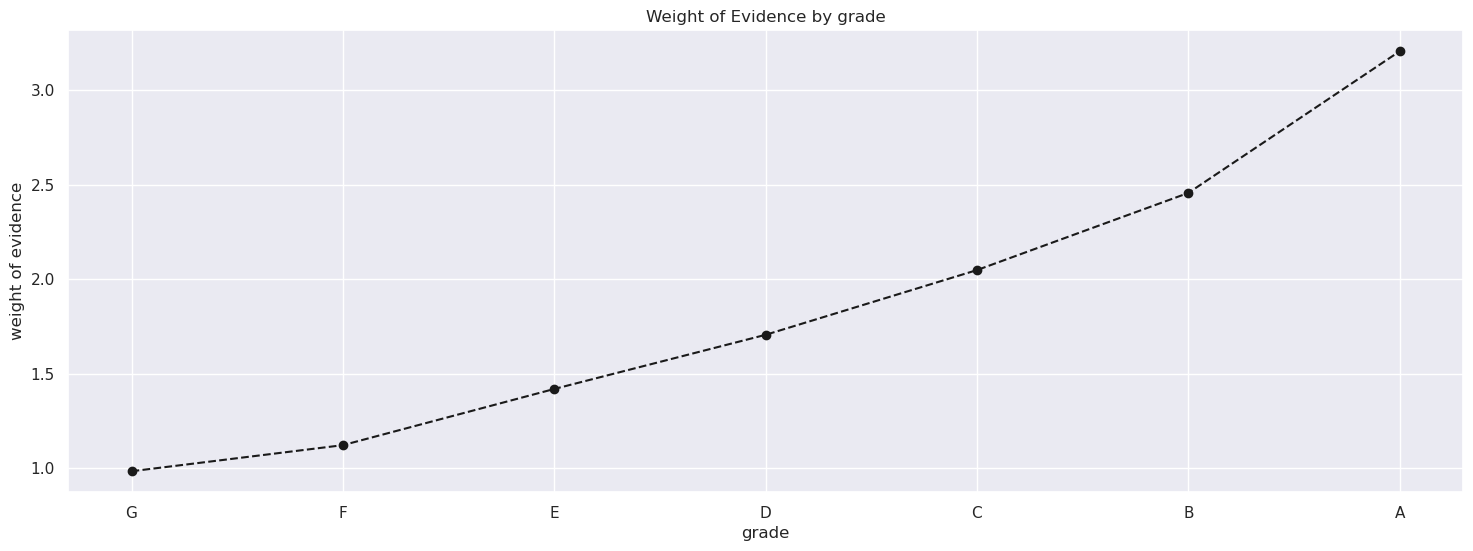

In [643]:
#pass the dataframe into the plot_by_woe function
plot_by_woe(df_temp)

##### Preprocessing Discrete Variables:Creating Dummy Variable,Part 1

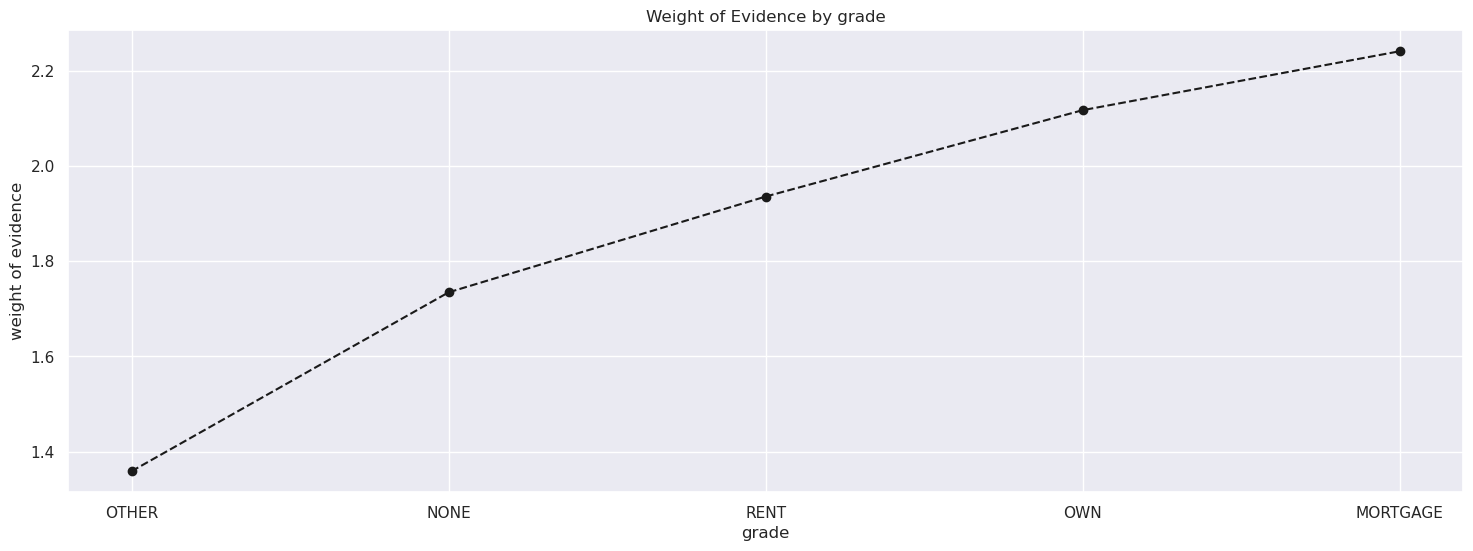

In [644]:
#repeat the similar steps:
# Apply the woe_discrete function on 'home_ownership'
df_temp_home_ownership = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)

# Create the WoE plot for 'home_ownership'
plot_by_woe(df_temp_home_ownership)

In [645]:
#we will be creating one hot enconding for all these unique values in each column so we will try to minimize the number of unique values by merging the unique values:

#add the binary values of values 'RENT','OTHER','NONE','ANY' as they have similar WoE values
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([
    df_inputs_prepr['home_ownership:RENT'],
    df_inputs_prepr['home_ownership:OTHER'],
    df_inputs_prepr['home_ownership:NONE'],
    df_inputs_prepr['home_ownership:ANY']
])


### PREPROCESSING DISCRETE VARRIABLES:DUMMMY VARRIABLES

In [646]:
#check the unique values in addr_state
df_inputs_prepr['addr_state'].unique()


array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [647]:
#apply the function woe_discrete on 'addr_state'
df_temp_adr_state = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)

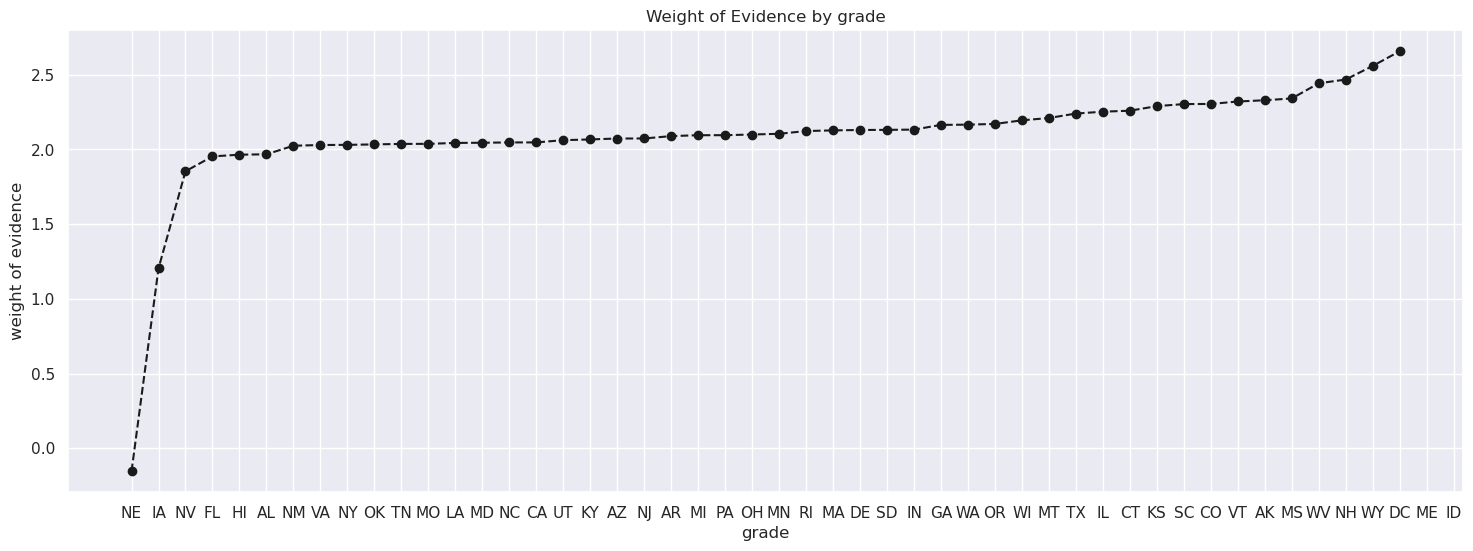

In [648]:
#plot the woe_plot
df_temp_addr_state = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
plot_by_woe(df_temp_addr_state)


In [649]:
#adding the state 'ND' if it is not present in columns and make it zero if not present
if['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND']=0

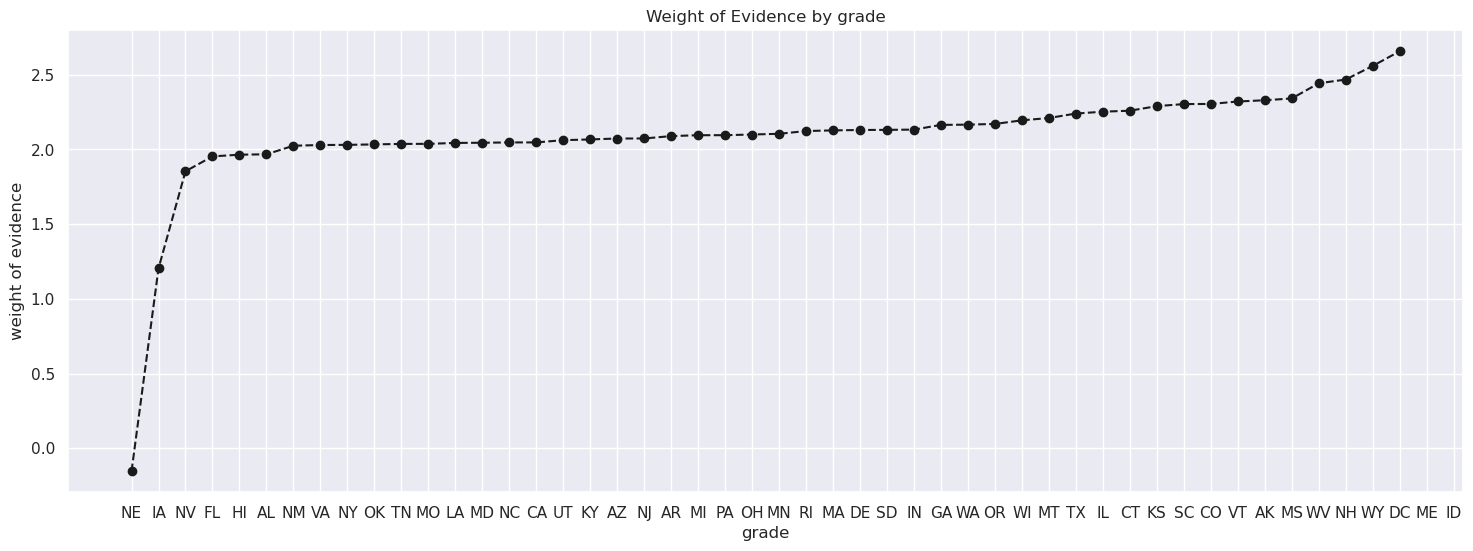

In [650]:
#plot the woe_plot
plot_by_woe(df_temp_addr_state)


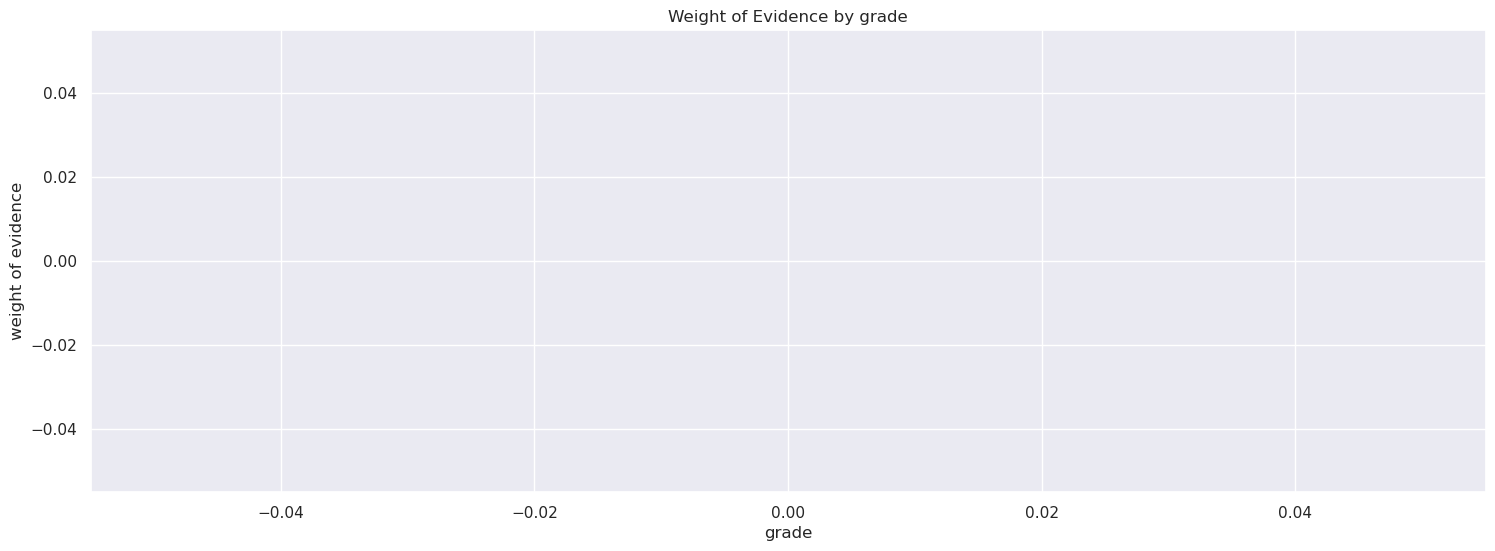

In [651]:
#woe_plot for values whose WoE values differs at large
plot_by_woe(df_temp.iloc[6:-6,:])

Now we are consolidating the binary values for certain states that have similar WoE values into new columns. This is a common approach to reducing the number of unique values and simplifying the model while preserving the information from the original data.

In [652]:
##add the binary values of values as they have similar WoE values


df_inputs_prepr['addr_state:ND_NE_IA_NC_FL_HI_AL']=sum([df_inputs_prepr['addr_state:ND'],df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:NE'],df_inputs_prepr['addr_state:NC'],
                                                       df_inputs_prepr['addr_state:FL'],df_inputs_prepr['addr_state:HI'], 
                                                       df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA']=sum([df_inputs_prepr['addr_state:NM'],df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC']=sum([df_inputs_prepr['addr_state:OK'],df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'],df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'],df_inputs_prepr['addr_state:NC']])


df_inputs_prepr['addr_state:UT_KY_AZ_NJ']=sum([df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:KY'],
                                                       df_inputs_prepr['addr_state:AZ'],df_inputs_prepr['addr_state:NJ']])


df_inputs_prepr['addr_state:AR_MI_PA_OH_MN']=sum([df_inputs_prepr['addr_state:AR'],df_inputs_prepr['addr_state:MI'],
                                                       df_inputs_prepr['addr_state:PA'],df_inputs_prepr['addr_state:OH'],
                                                       df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN']=sum([df_inputs_prepr['addr_state:RI'],df_inputs_prepr['addr_state:MA'],
                                                       df_inputs_prepr['addr_state:DE'],df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR']=sum([df_inputs_prepr['addr_state:GA'],df_inputs_prepr['addr_state:WA'],
                                                       df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT']=sum([df_inputs_prepr['addr_state:WI'],df_inputs_prepr['addr_state:MT']])


df_inputs_prepr['addr_state:IL_CT']=sum([df_inputs_prepr['addr_state:IL'],df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS']=sum([df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'],df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'],df_inputs_prepr['addr_state:MS']])


df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID']=sum([df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'],df_inputs_prepr['addr_state:ID']])

In [653]:
#check the unique values of verification_status column
df_inputs_prepr['verification_status'].unique()


array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [654]:
#apply the woe_discrete function
df_temp_verification_status = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp_verification_status


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.051467,1.925776,NaN,NaN,0.743795
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.037601,2.152666,0.023137,0.226891,0.743795
2,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.033664,2.261977,0.009761,0.109311,0.743795


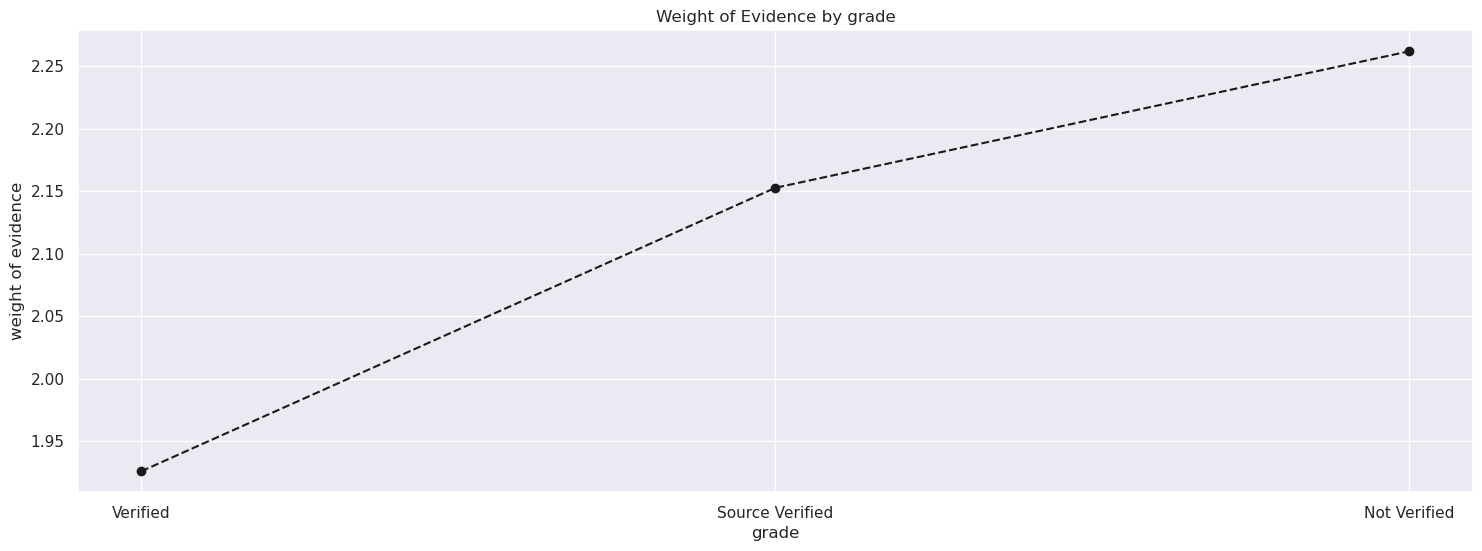

In [655]:
#plot the woe plot
plot_by_woe(df_temp_verification_status)


In [656]:
#check the unique values of 'purpose'
unique_purpose = df_inputs_prepr['purpose'].unique()
print(unique_purpose)


['debt_consolidation' 'educational' 'other' 'home_improvement'
 'credit_card' 'major_purchase' 'wedding' 'small_business' 'vacation'
 'house' 'car' 'moving' 'renewable_energy' 'medical']


In [657]:
#apply the woe_discrete on 'purpose'
df_temp_purpose = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp_purpose


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.003594,1.301565,NaN,NaN,0.744802
1,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.000199,1.397594,0.015704,0.096029,0.744802
2,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.001156,1.654252,0.037663,0.256658,0.744802
3,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.000771,1.816198,0.020644,0.161946,0.744802
4,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.007828,1.834226,0.002155,0.018028,0.744802
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000114,1.855475,0.002504,0.021250,0.744802
6,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.001460,1.886445,0.003581,0.030969,0.744802
7,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.000671,2.009808,0.013473,0.123363,0.744802
8,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.000704,2.016042,0.000648,0.006234,0.744802
9,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.074622,2.059305,0.004413,0.043263,0.744802


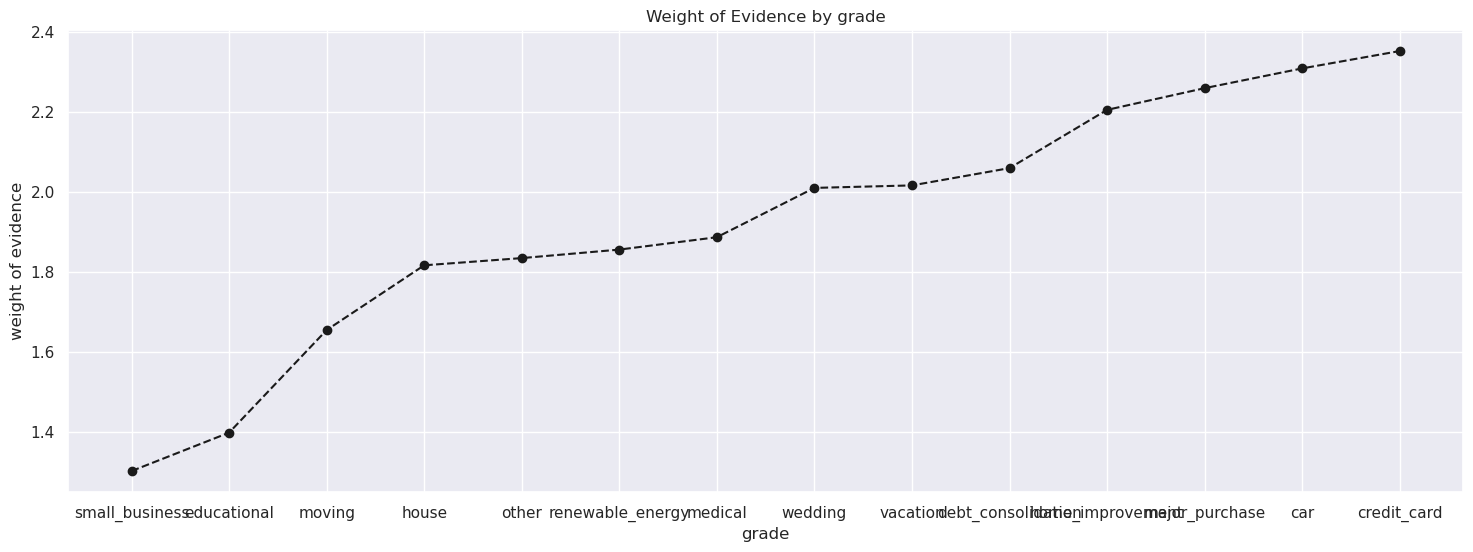

In [658]:
#plot the woe plot
plot_by_woe(df_temp_purpose)


In [659]:
#make all the similar woe values in one column

df_inputs_prepr['purpose:educ_sm_b_wedd_ren_en_mov_house']=sum([df_inputs_prepr['purpose:small_business'],df_inputs_prepr['purpose:educational'],
                                                               df_inputs_prepr['purpose:renewable_energy'],df_inputs_prepr['purpose:moving'],
                                                               df_inputs_prepr['purpose:house'],df_inputs_prepr['purpose:other'],
                                                               df_inputs_prepr['purpose:medical'],df_inputs_prepr['purpose:wedding'],
                                                               df_inputs_prepr['purpose:vacation'],df_inputs_prepr['purpose:debt_consolidation'],
                                                               df_inputs_prepr['purpose:home_improvement'],df_inputs_prepr['purpose:major_purchase'],
                                                               df_inputs_prepr['purpose:car'],df_inputs_prepr['purpose:credit_card']])

The purpose of combining similar categories in this way is to reduce the number of unique values in the 'purpose' column, which can simplify the dataset and potentially improve the interpretability of the model. Combining categories with similar WoE values can help to capture the underlying patterns and relationships between these categories more effectively, especially when they have similar effects on the target variable.

In [660]:
#check the 'initial_list_status' unique values
unique_values_initial_list_status = df_inputs_prepr['initial_list_status'].unique()
print(unique_values_initial_list_status)


['f' 'w']


In [661]:
#apply the woe_discrete function
df_temp_initial_list_status = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp_initial_list_status


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.087813,1.989531,NaN,NaN,0.744028
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.034919,2.327206,0.031412,0.337675,0.744028


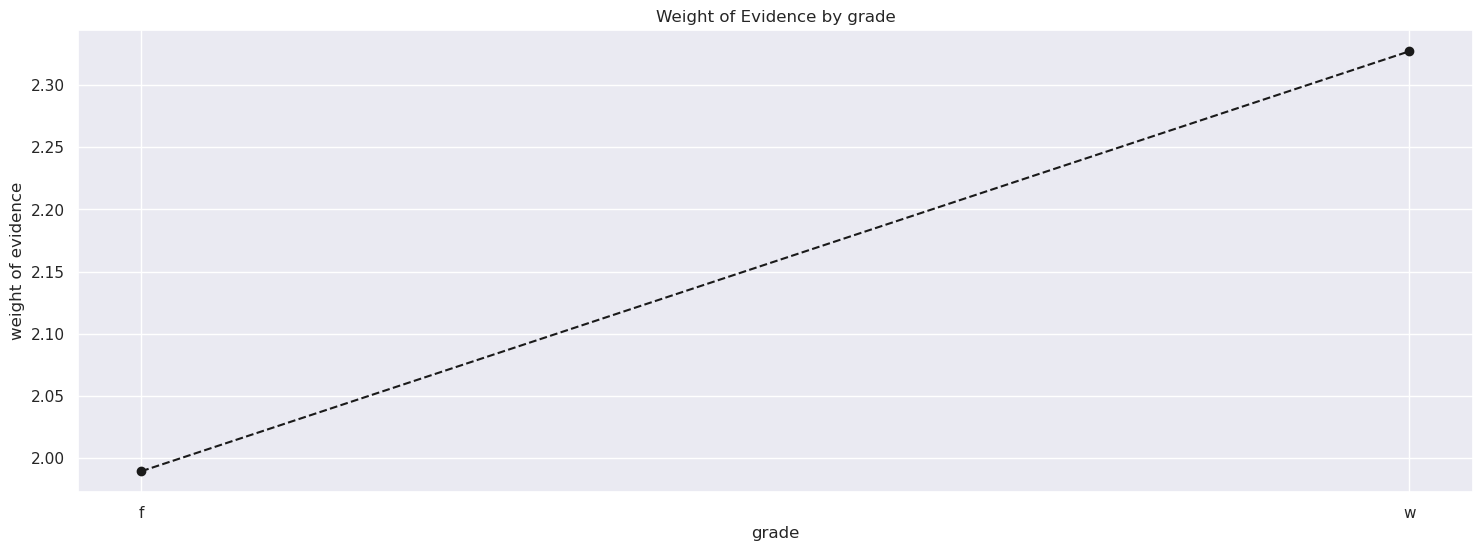

In [662]:
#plot the woe plot
plot_by_woe(df_temp_initial_list_status)


## PREPROCESSING CONTINUOUS VARIABLES:  AUTOMATING CALCULATIONS AND VISUALIZING RESULTS

In [663]:
#Earlier we defined a function for categorical values

#Now, this is the function for preprocessing of continuous variables

def woe_continuous(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

PREPROCESSING CONTNUOUS VARIABLES:CREATING DUMMY VARIABLES

In [664]:
#check the 'term_int' unique values
term_int_unique = df_inputs_prepr['term_int'].unique()
print(term_int_unique)


[36 60]


In [665]:
#apply the woe_continuous function
# Apply the woe_continuous function on 'term_int'
woe_term = woe_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)

# Display the result
woe_term


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.078953,2.230954,NaN,NaN,0.745024
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.043780,1.800736,0.044756,0.430218,0.745024


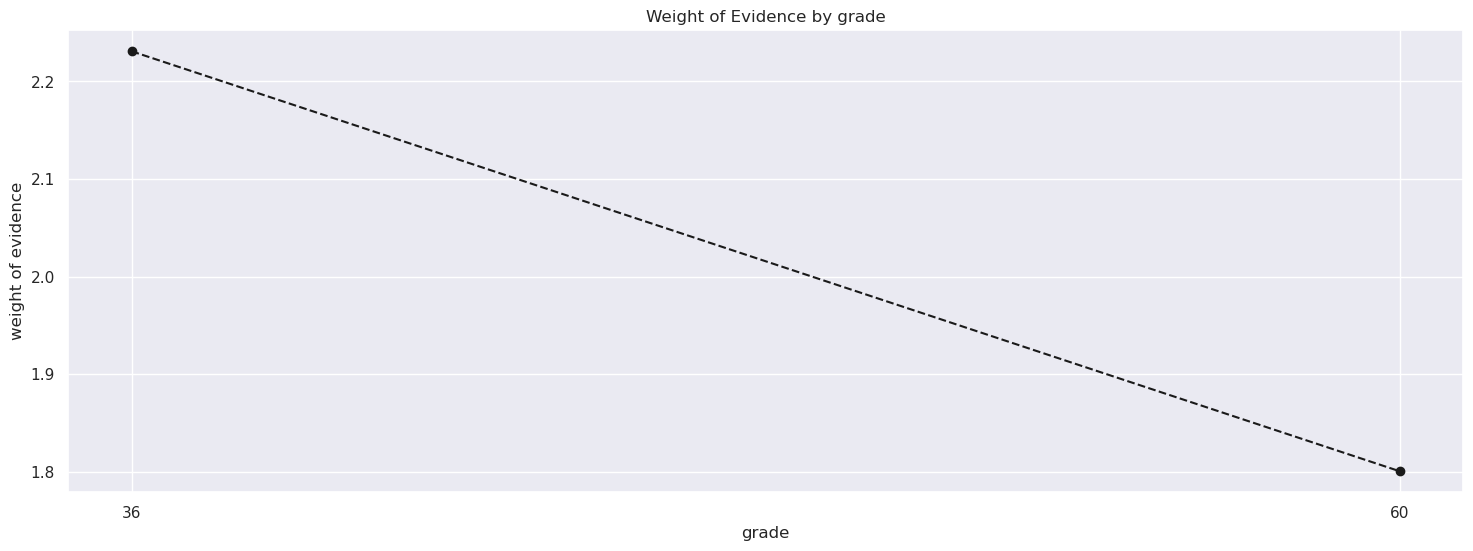

In [666]:
#plot the woe plot
plot_by_woe(woe_term)


In [667]:
#Convert it into binary encoded format by putting 1 and 0 inplace

df_inputs_prepr['term:36']=np.where((df_inputs_prepr['term_int'] ==36),1,0)
df_inputs_prepr['term:60']=np.where((df_inputs_prepr['term_int']==60),1,0)

In [668]:
#check the unique values of 'emp_length_int' column
unique_emp_length_int = df_inputs_prepr['emp_length_int'].unique()
print(unique_emp_length_int)


[3.0 6.0 10.0 7.0 5.0 0.5 2.0 9.0 1.0 8.0 '0' 4.0]


In [669]:
#apply the woe_continuous function
woe_emp_length_int = woe_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
woe_emp_length_int

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.5,28912,0.881157,0.077506,25476.0,3436.0,0.076677,0.010342,2.003429,NaN,NaN,0.742965
1,1.0,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.008045,2.060416,0.005839,0.056987,0.742965
2,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.010856,2.100530,0.003959,0.040114,0.742965
3,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.009601,2.098652,0.000183,0.001878,0.742965
4,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.007395,2.097341,0.000128,0.001311,0.742965
5,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.008536,2.037955,0.005920,0.059387,0.742965
6,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.007299,2.029883,0.000826,0.008071,0.742965
7,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.007130,2.064986,0.003554,0.035102,0.742965
8,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.005917,2.089500,0.002425,0.024515,0.742965
9,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.004867,2.057085,0.003217,0.032416,0.742965


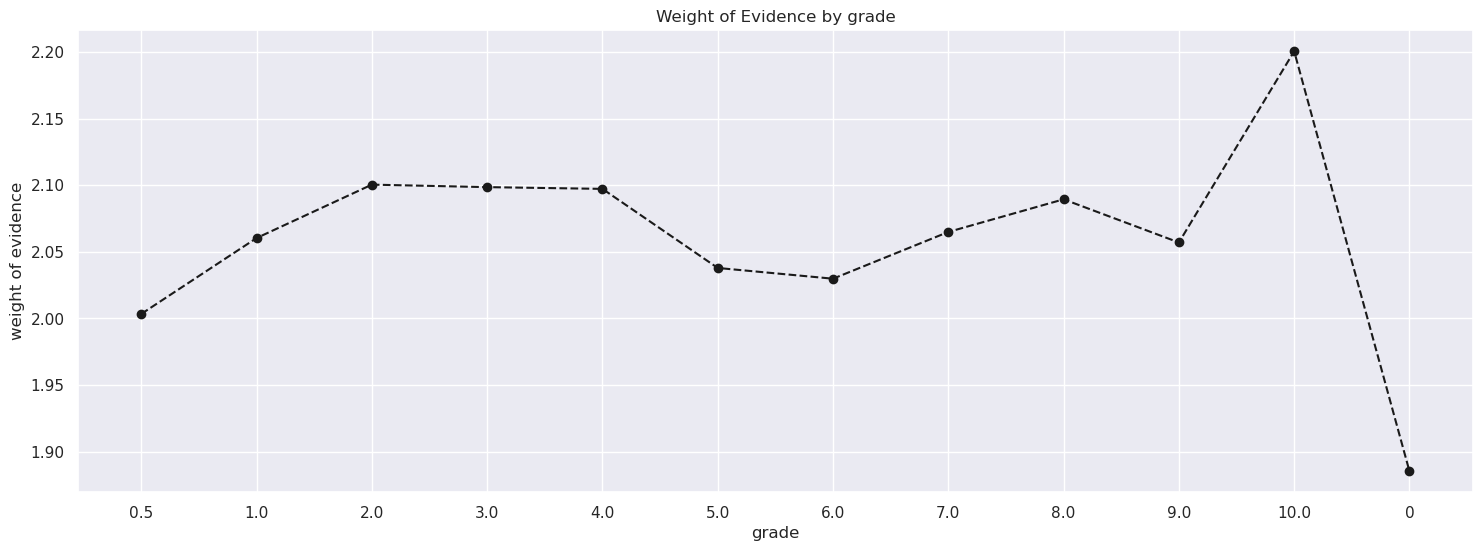

In [670]:
#plot the woe plot
plot_by_woe(woe_emp_length_int)


In [671]:
##Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['emp_length:0']=np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1']=np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4']=np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6']=np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9']=np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10']=np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

In [672]:
#check the unique values in 'mths_since_issued_date' column
unique_mths_since_issued_date = df_inputs_prepr['mths_since_issued_date'].unique()
print(unique_mths_since_issued_date)


[ 69.  88.  78.  68. 125.  61. 115.  77.  66.  81.  82.  67.  64.  75.
  83. 137.  74.  86.  73.  71.  72.  65.  62.  90.  93. 111.  70. 100.
  87.  63.  85. 113.  89.  80. 103.  92.  76.  84.  97.  98.  94. 112.
 105. 106.  79. 127. 107.  96. 109.  60.  95. 116. 101.  91. 108. 110.
 114. 140. 117. 119. 102.  99. 104. 120. 118. 122. 128. 149. 129. 142.
 134. 143. 138. 121. 126. 130. 124. 146. 145. 132. 141. 144. 148. 123.
 139. 136. 133. 147. 131. 150. 135.]


In [673]:
#apply the cut function defined in pandas so that we get a range divided values for continous variable

df_inputs_prepr['mths_since_issued_date_factor']=pd.cut(df_inputs_prepr['mths_since_issued_date'],50)

Each bin represents a range of values. In this case, we're dividing the 'mths_since_issued_date' variable into 50 bins.

In [674]:
#check how the buckets are divided
df_inputs_prepr['mths_since_issued_date_factor']

427211      (67.2, 69.0]
206088      (87.0, 88.8]
136020      (76.2, 78.0]
412305      (67.2, 69.0]
36159     (124.8, 126.6]
               ...      
259178     (59.91, 61.8]
365838      (65.4, 67.2]
131932      (76.2, 78.0]
146867      (79.8, 81.6]
121958      (76.2, 78.0]
Name: mths_since_issued_date_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(59.91, 61.8] < (61.8, 63.6] < (63.6, 65.4] < (65.4, 67.2] ... (142.8, 144.6] < (144.6, 146.4] < (146.4, 148.2] < (148.2, 150.0]]

In [675]:
#apply the woe_continuous function
df_temp=woe_continuous(df_inputs_prepr,'mths_since_issued_date_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(59.91, 61.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.004897,2.792028,NaN,NaN,0.749411
1,"(61.8, 63.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.008539,2.562724,0.013820,0.229305,0.749411
2,"(63.6, 65.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.009613,2.406003,0.011140,0.156721,0.749411
3,"(65.4, 67.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.007988,2.296690,0.008681,0.109313,0.749411
4,"(67.2, 69.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.008385,2.217243,0.006815,0.079447,0.749411
5,"(69.0, 70.8]",12165,0.899301,0.032611,10940.0,1225.0,0.032927,0.003687,2.189485,0.002486,0.027758,0.749411
6,"(70.8, 72.6]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.007440,2.185060,0.000401,0.004425,0.749411
7,"(72.6, 74.4]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.007720,2.073772,0.010572,0.111287,0.749411
8,"(74.4, 76.2]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.007422,1.997395,0.007804,0.076378,0.749411
9,"(76.2, 78.0]",18312,0.866863,0.049090,15874.0,2438.0,0.047777,0.007338,1.873505,0.013660,0.123890,0.749411


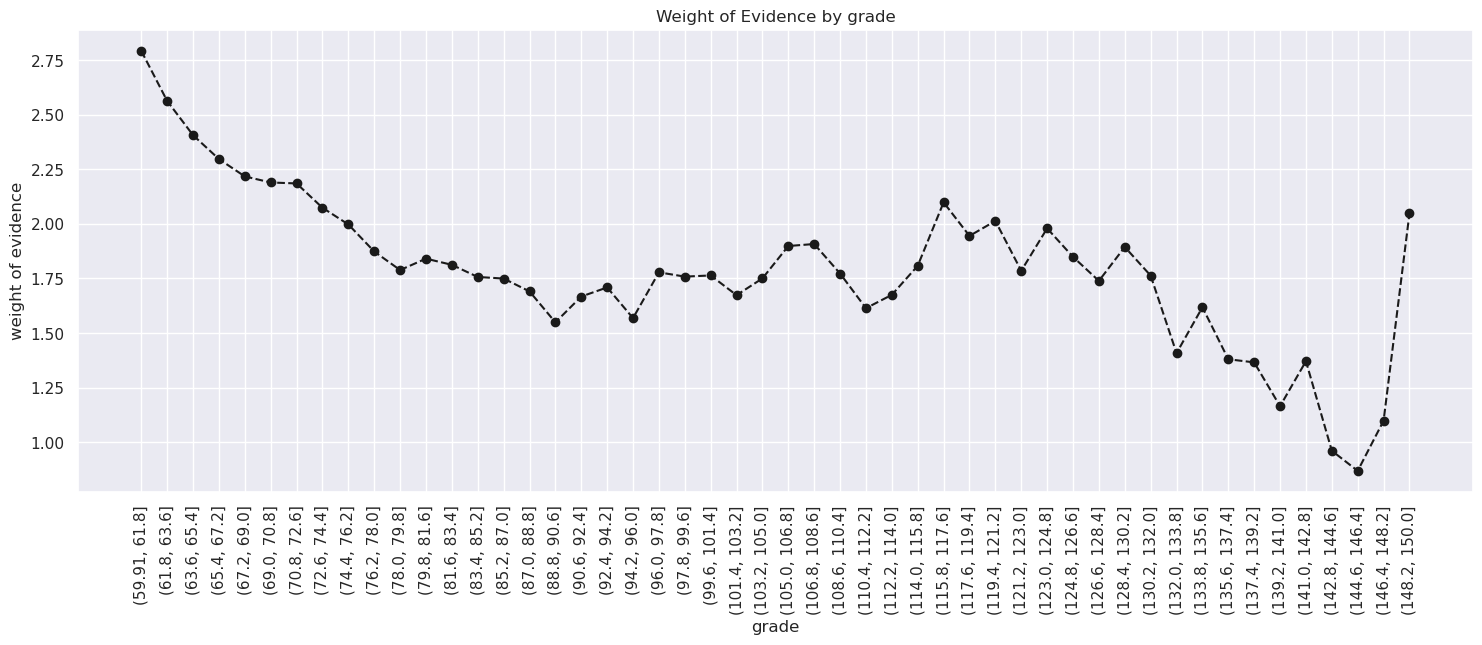

In [676]:
#plot the woe plot
plot_by_woe(df_temp,90)

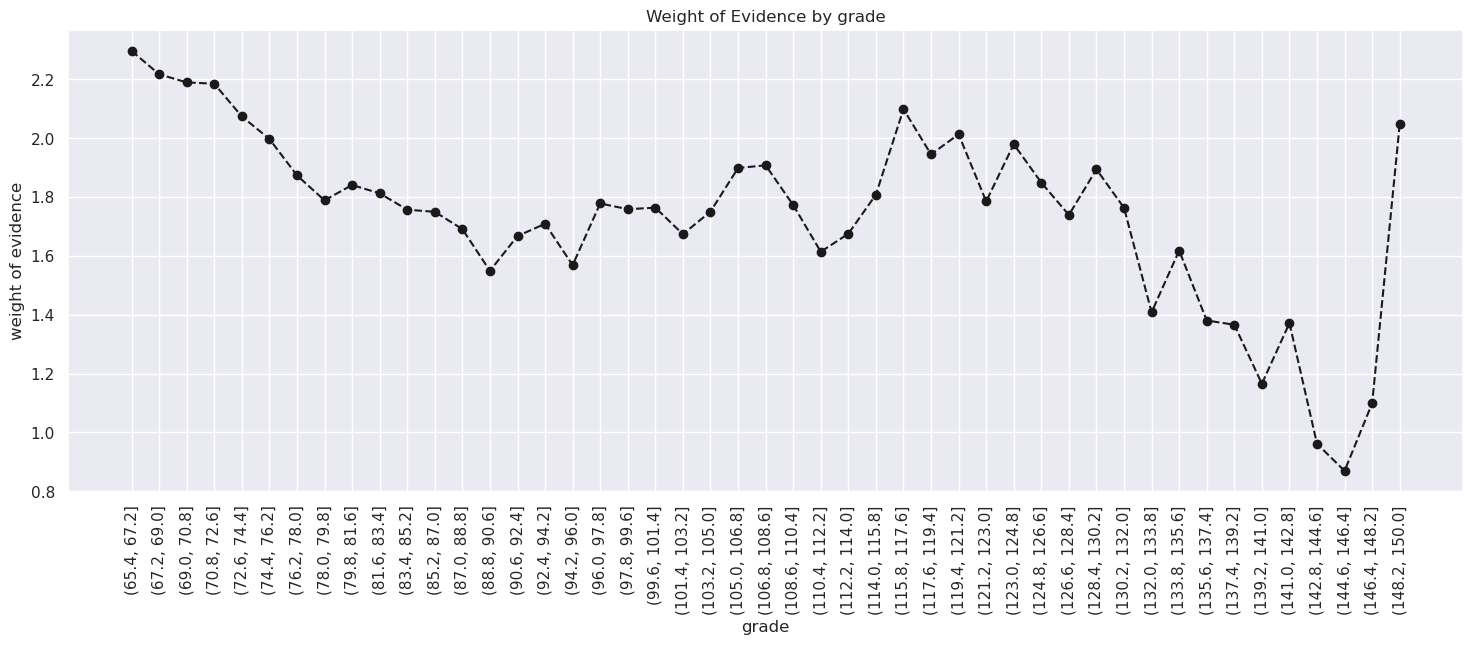

In [677]:
#more variation of woe plot
plot_by_woe(df_temp.iloc[3:,:],90)

In [678]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_issued_date:<38']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38)),1,0)
df_inputs_prepr['mths_since_issued_date:38-39']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38,40)),1,0)
df_inputs_prepr['mths_since_issued_date:40-41']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(40,42)),1,0)
df_inputs_prepr['mths_since_issued_date:42-48']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(42,49)),1,0)
df_inputs_prepr['mths_since_issued_date:49-52']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(49,53)),1,0)
df_inputs_prepr['mths_since_issued_date:53-64']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(53,65)),1,0)
df_inputs_prepr['mths_since_issued_date:65-84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(65,85)),1,0)
df_inputs_prepr['mths_since_issued_date:>84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(85,int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [679]:
#apply the cut function on 'int_rate_factor'
# Apply the cut function on 'int_rate_factor'
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], bins=20)

# Apply the woe_continuous function
df_temp = woe_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 6.452]",9292,0.978907,0.024910,9096.0,196.0,0.027377,0.000590,3.837475,NaN,NaN,0.761583
1,"(6.452, 7.484]",12737,0.972835,0.034145,12391.0,346.0,0.037294,0.001041,3.578287,0.006072,0.259188,0.761583
2,"(7.484, 8.516]",27133,0.957948,0.072737,25992.0,1141.0,0.078230,0.003434,3.125884,0.014887,0.452403,0.761583
3,"(8.516, 9.548]",17949,0.950359,0.048117,17058.0,891.0,0.051341,0.002682,2.952030,0.007589,0.173854,0.761583
4,"(9.548, 10.58]",20211,0.934887,0.054181,18895.0,1316.0,0.056870,0.003961,2.664301,0.015472,0.287730,0.761583
5,"(10.58, 11.612]",26902,0.922459,0.072118,24816.0,2086.0,0.074691,0.006278,2.476240,0.012428,0.188060,0.761583
6,"(11.612, 12.644]",36209,0.919523,0.097068,33295.0,2914.0,0.100211,0.008771,2.435881,0.002937,0.040360,0.761583
7,"(12.644, 13.676]",39510,0.903872,0.105917,35712.0,3798.0,0.107485,0.011431,2.241012,0.015650,0.194868,0.761583
8,"(13.676, 14.708]",38059,0.888857,0.102027,33829.0,4230.0,0.101818,0.012731,2.079116,0.015016,0.161896,0.761583
9,"(14.708, 15.74]",31960,0.882541,0.085677,28206.0,3754.0,0.084894,0.011299,2.016713,0.006316,0.062404,0.761583


In [680]:
# Apply the woe_continuous function
df_temp = woe_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 6.452]",9292,0.978907,0.024910,9096.0,196.0,0.027377,0.000590,3.837475,NaN,NaN,0.761583
1,"(6.452, 7.484]",12737,0.972835,0.034145,12391.0,346.0,0.037294,0.001041,3.578287,0.006072,0.259188,0.761583
2,"(7.484, 8.516]",27133,0.957948,0.072737,25992.0,1141.0,0.078230,0.003434,3.125884,0.014887,0.452403,0.761583
3,"(8.516, 9.548]",17949,0.950359,0.048117,17058.0,891.0,0.051341,0.002682,2.952030,0.007589,0.173854,0.761583
4,"(9.548, 10.58]",20211,0.934887,0.054181,18895.0,1316.0,0.056870,0.003961,2.664301,0.015472,0.287730,0.761583
5,"(10.58, 11.612]",26902,0.922459,0.072118,24816.0,2086.0,0.074691,0.006278,2.476240,0.012428,0.188060,0.761583
6,"(11.612, 12.644]",36209,0.919523,0.097068,33295.0,2914.0,0.100211,0.008771,2.435881,0.002937,0.040360,0.761583
7,"(12.644, 13.676]",39510,0.903872,0.105917,35712.0,3798.0,0.107485,0.011431,2.241012,0.015650,0.194868,0.761583
8,"(13.676, 14.708]",38059,0.888857,0.102027,33829.0,4230.0,0.101818,0.012731,2.079116,0.015016,0.161896,0.761583
9,"(14.708, 15.74]",31960,0.882541,0.085677,28206.0,3754.0,0.084894,0.011299,2.016713,0.006316,0.062404,0.761583


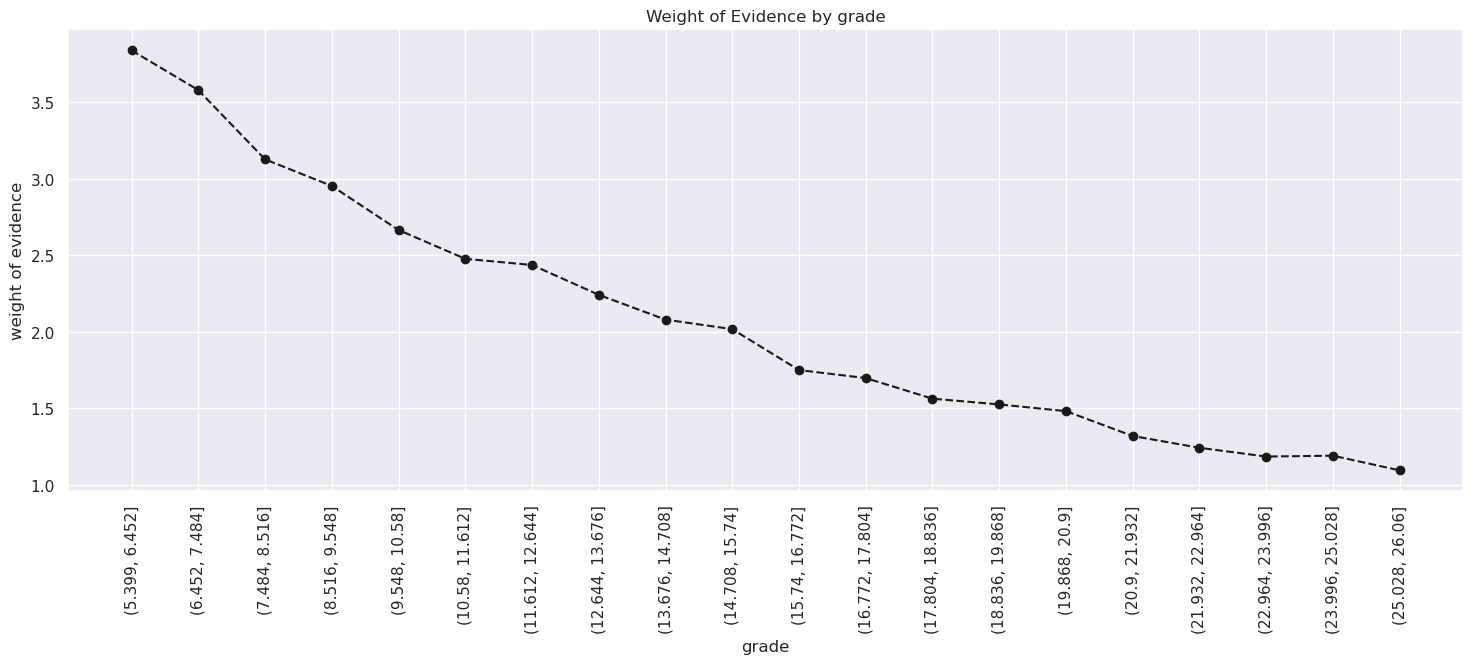

In [681]:
# Plot the WoE plot
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)


In [682]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['int_rate:<9.548']=np.where((df_inputs_prepr['int_rate']<= 0.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025']=np.where((df_inputs_prepr['int_rate']>9.548)&(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74']=np.where((df_inputs_prepr['int_rate']>12.025)&(df_inputs_prepr['int_rate']<=15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281']=np.where((df_inputs_prepr['int_rate']>15.74)&(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:20.281']=np.where((df_inputs_prepr['int_rate']>20.281),1,0)



# **We will be repeating the similar steps for all continuous variables:**

**1.Apply the cut function if unique values are many**

**2.apply the woe_continuos function**

**3.plot the woe_plot**

**4.Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other**

In [683]:
#prepossing of 'funded_amt_factor'

df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)

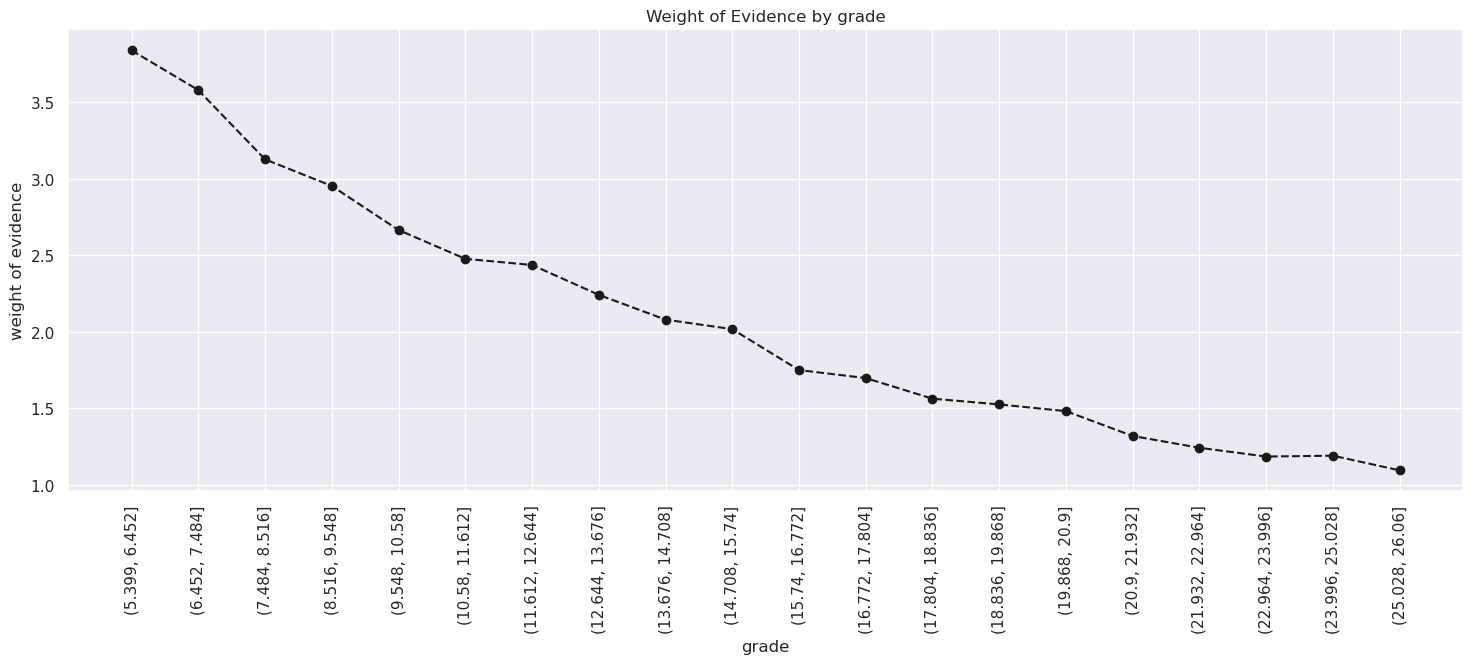

In [684]:
#plot the woe_plot
plot_by_woe(df_temp,90)

In [685]:
#convert the 'mths_since_earliest_cr_line' to float
df_inputs_prepr['mths_since_earliest_cr_line'] = df_inputs_prepr['mths_since_earliest_cr_line'].astype(float)


In [686]:
#apply the cut function on 'mths_since_earliest_cr_line'
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)


In [687]:
#check the 'mths_since_earliest_cr_line_factor'
df_inputs_prepr['mths_since_earliest_cr_line_factor'].unique()


[(391.04, 403.26], (256.62, 268.84], (329.94, 342.16], (244.4, 256.62], (232.18, 244.4], ..., (-0.611, 12.22], (586.56, 598.78], (549.9, 562.12], (562.12, 574.34], (85.54, 97.76]]
Length: 44
Categories (50, interval[float64, right]): [(-0.611, 12.22] < (12.22, 24.44] < (24.44, 36.66] < (36.66, 48.88] ... (562.12, 574.34] < (574.34, 586.56] < (586.56, 598.78] < (598.78, 611.0]]

In [688]:
#apply the woe_continuos function
df_temp = woe_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.611, 12.22]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000009,1.945910,NaN,NaN,0.743523
1,"(12.22, 24.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743523
2,"(24.44, 36.66]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743523
3,"(36.66, 48.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743523
4,"(48.88, 61.1]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743523
5,"(61.1, 73.32]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743523
6,"(73.32, 85.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743523
7,"(85.54, 97.76]",2,1.000000,0.000005,2.0,0.0,0.000006,0.000000,inf,NaN,NaN,0.743523
8,"(97.76, 109.98]",1149,0.901654,0.003080,1036.0,113.0,0.003118,0.000340,2.215735,0.098346,inf,0.743523
9,"(109.98, 122.2]",2624,0.865473,0.007034,2271.0,353.0,0.006835,0.001062,1.861507,0.036181,0.354227,0.743523


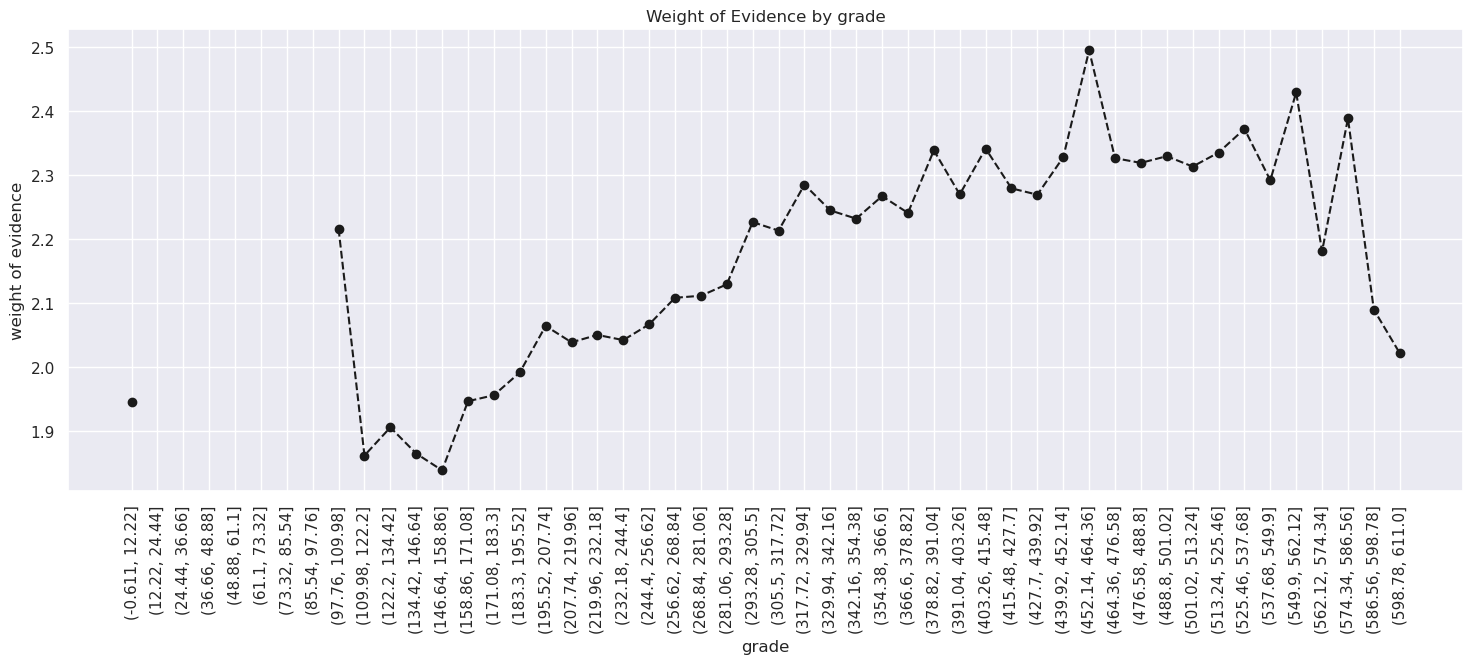

In [689]:
#plot the woe_plot
plot_by_woe(df_temp, 90)


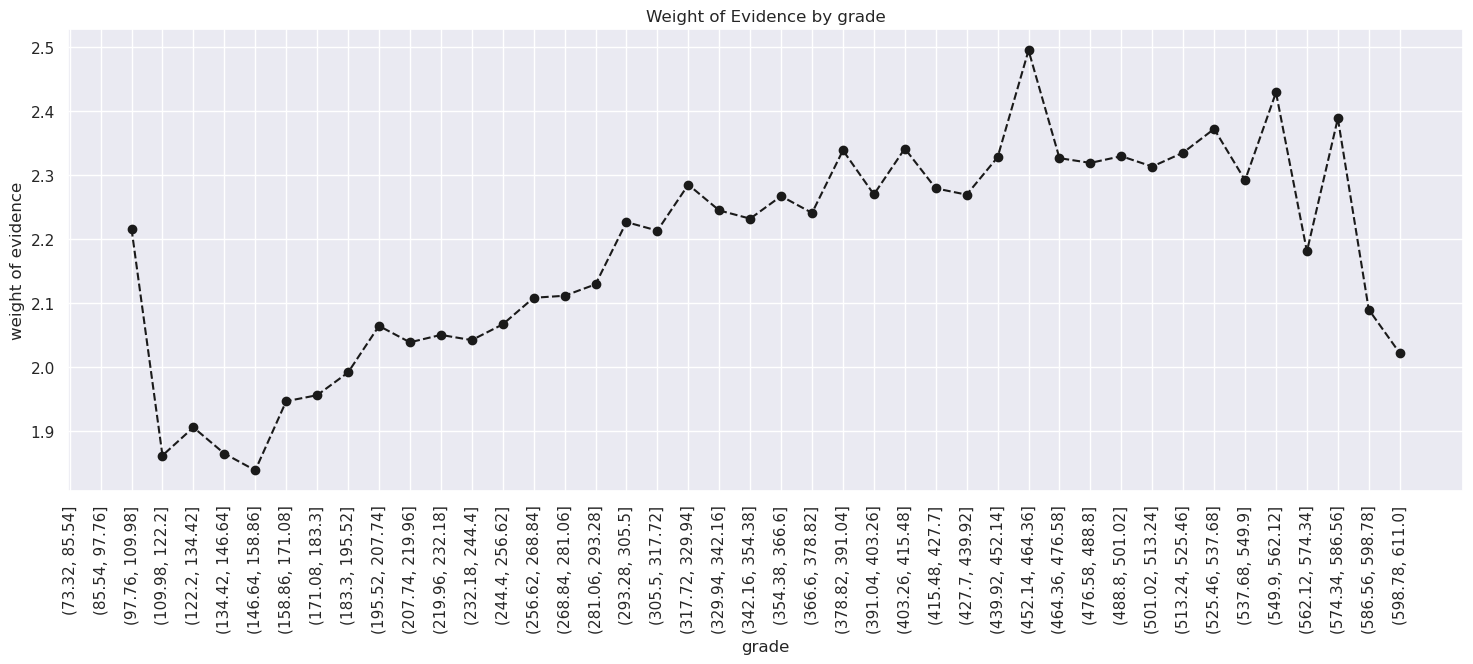

In [690]:
#plot for df_temp.iloc[3:,:],90
plot_by_woe(df_temp.iloc[3:,:],90)

In [691]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line'] < 140), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:140-239'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line'] >= 140) & (df_inputs_prepr['mths_since_earliest_cr_line'] < 240), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:240-339'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line'] >= 240) & (df_inputs_prepr['mths_since_earliest_cr_line'] < 340), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:340-439'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line'] >= 340) & (df_inputs_prepr['mths_since_earliest_cr_line'] < 440), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:440-539'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line'] >= 440) & (df_inputs_prepr['mths_since_earliest_cr_line'] < 540), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:540-600'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line'] >= 540) & (df_inputs_prepr['mths_since_earliest_cr_line'] <= 600), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>600'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line'] > 600), 1, 0)


In [692]:
#check the 'installment' unique values
unique_installments = df_inputs_prepr['installment'].unique()
print(unique_installments)


[762.08 343.39 648.56 ... 718.44 735.11 464.48]


In [693]:
#apply the cut function and woe_continuos function on 'installment'
# Apply the cut function on 'installment'
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

# Apply the woe_continuous function
df_temp_installment = woe_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)




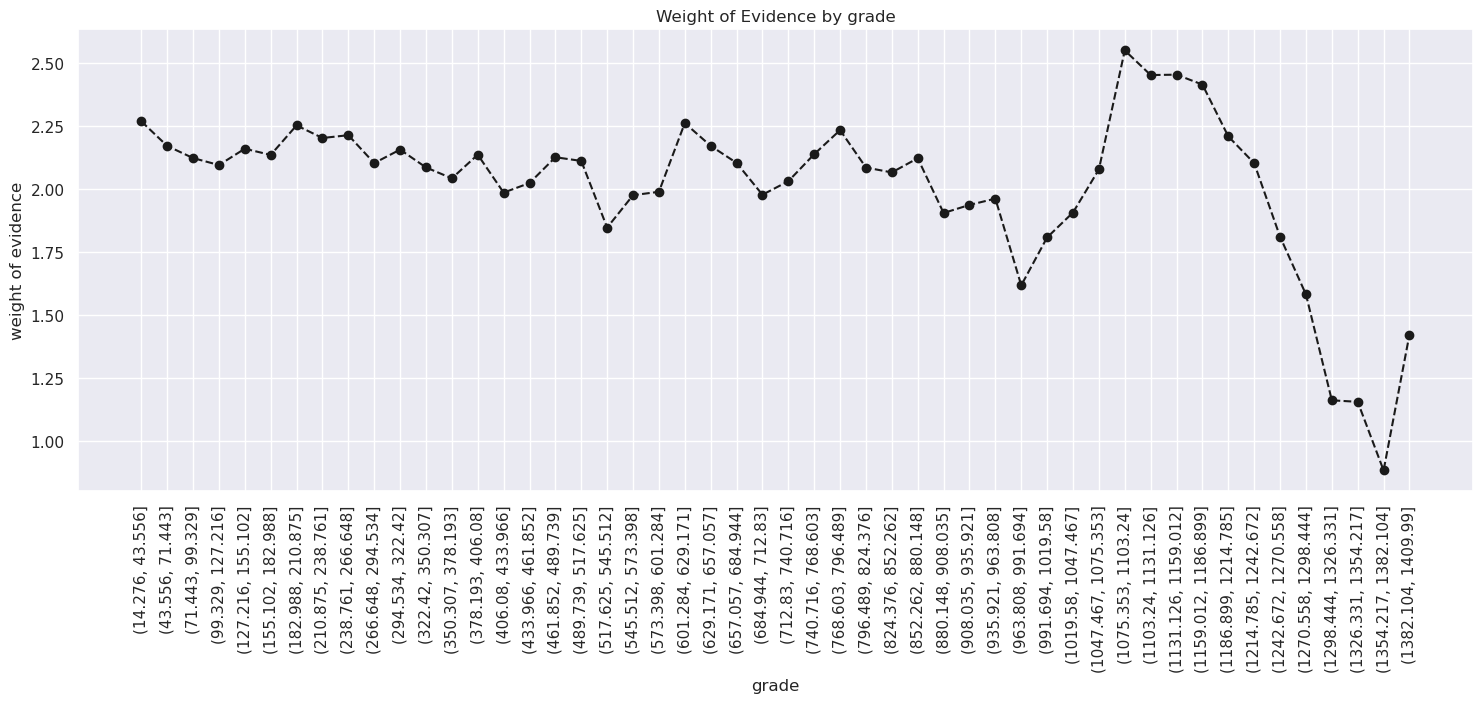

In [694]:
#plot the woe_plot
plot_by_woe(df_temp_installment, 90)

In [695]:
#check the 'deling_2yrs' column
# Check the unique values in the 'delinq_2yrs' column
delinq_2yrs_unique = df_inputs_prepr['delinq_2yrs'].unique()
print(delinq_2yrs_unique)


[0.0 1.0 4.0 2.0 5.0 3.0 6.0 9.0 8.0 7.0 '0' 11.0 24.0 10.0 12.0 18.0 13.0
 14.0 17.0 19.0 15.0 16.0 22.0 21.0 29.0]


In [699]:
# apply the cut function
df_inputs_prepr['delinq_2yrs'] = df_inputs_prepr['delinq_2yrs'].astype(float)
df_inputs_prepr['delinq_2yrs_factors'] = pd.cut(df_inputs_prepr['delinq_2yrs'], bins=10)


In [700]:
#apply the woe_continuos function
# Apply the woe_continuous function
df_temp = woe_continuous(df_inputs_prepr, 'delinq_2yrs_factors', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.029, 2.9]",364462,0.890784,0.977037,324657.0,39805.0,0.977147,0.119804,2.098777,NaN,NaN,0.742547
1,"(2.9, 5.8]",7384,0.887053,0.019795,6550.0,834.0,0.019714,0.002510,2.060987,0.003731,0.037790,0.742547
2,"(5.8, 8.7]",928,0.890086,0.002488,826.0,102.0,0.002486,0.000307,2.091622,0.003033,0.030635,0.742547
3,"(8.7, 11.6]",176,0.880682,0.000472,155.0,21.0,0.000467,0.000063,1.998903,0.009404,0.092719,0.742547
4,"(11.6, 14.5]",54,0.777778,0.000145,42.0,12.0,0.000126,0.000036,1.252763,0.102904,0.746140,0.742547
5,"(14.5, 17.4]",13,0.846154,0.000035,11.0,2.0,0.000033,0.000006,1.704748,0.068376,0.451985,0.742547
6,"(17.4, 20.3]",5,0.800000,0.000013,4.0,1.0,0.000012,0.000003,1.386294,0.046154,0.318454,0.742547
7,"(20.3, 23.2]",4,0.750000,0.000011,3.0,1.0,0.000009,0.000003,1.098612,0.050000,0.287682,0.742547
8,"(23.2, 26.1]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.250000,inf,0.742547
9,"(26.1, 29.0]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,0.742547


In [701]:
df_inputs_prepr['delinq_2yrs_factors'].info()

<class 'pandas.core.series.Series'>
Int64Index: 373028 entries, 427211 to 121958
Series name: delinq_2yrs_factors
Non-Null Count   Dtype   
--------------   -----   
373028 non-null  category
dtypes: category(1)
memory usage: 3.2 MB


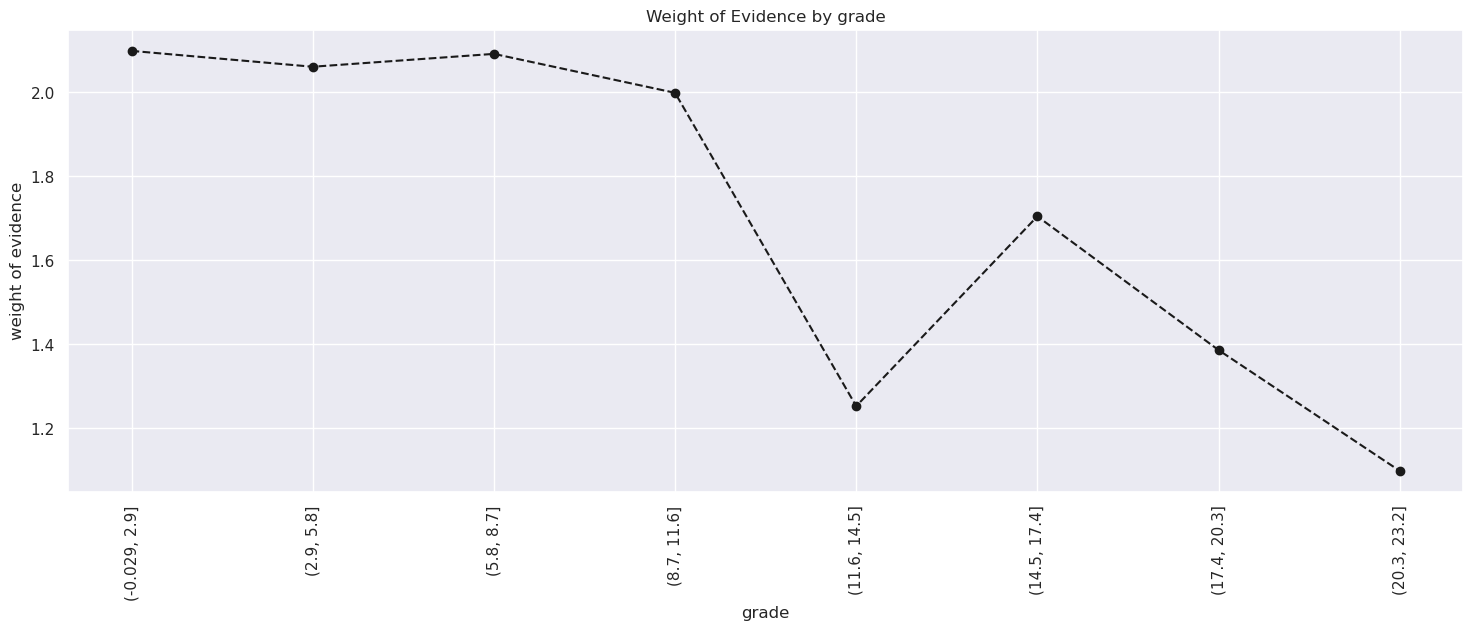

In [702]:
# plot the woe_plot
plot_by_woe(df_temp, 90)


In [705]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs_factors'].cat.codes == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:0-3'] = np.where((df_inputs_prepr['delinq_2yrs_factors'].cat.codes >= 1) & (df_inputs_prepr['delinq_2yrs_factors'].cat.codes <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:3-7'] = np.where((df_inputs_prepr['delinq_2yrs_factors'].cat.codes >= 4) & (df_inputs_prepr['delinq_2yrs_factors'].cat.codes <= 7), 1, 0)
df_inputs_prepr['delinq_2yrs:7-9'] = np.where((df_inputs_prepr['delinq_2yrs_factors'].cat.codes >= 8) & (df_inputs_prepr['delinq_2yrs_factors'].cat.codes <= 9), 1, 0)
df_inputs_prepr['delinq_2yrs:9-11'] = np.where((df_inputs_prepr['delinq_2yrs_factors'].cat.codes >= 10) & (df_inputs_prepr['delinq_2yrs_factors'].cat.codes <= 11), 1, 0)
df_inputs_prepr['delinq_2yrs:11-12'] = np.where((df_inputs_prepr['delinq_2yrs_factors'].cat.codes >= 12) & (df_inputs_prepr['delinq_2yrs_factors'].cat.codes <= 12), 1, 0)
df_inputs_prepr['delinq_2yrs:12-18'] = np.where((df_inputs_prepr['delinq_2yrs_factors'].cat.codes >= 13) & (df_inputs_prepr['delinq_2yrs_factors'].cat.codes <= 18), 1, 0)
df_inputs_prepr['delinq_2yrs:>18'] = np.where((df_inputs_prepr['delinq_2yrs_factors'].cat.codes >= 19), 1, 0)


In [706]:
#check the 'inq_last_6mths' column
unique_values = df_inputs_prepr['inq_last_6mths'].unique()
print(unique_values)


[1.0 2.0 3.0 0.0 4.0 5.0 6.0 7.0 '0' 8.0 9.0 12.0 28.0 11.0 15.0 14.0 13.0
 10.0 20.0 16.0 24.0 17.0 33.0 18.0 31.0 19.0 25.0 27.0 32.0]


In [707]:
#apply the woe_continuos function
df_temp = woe_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)


/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


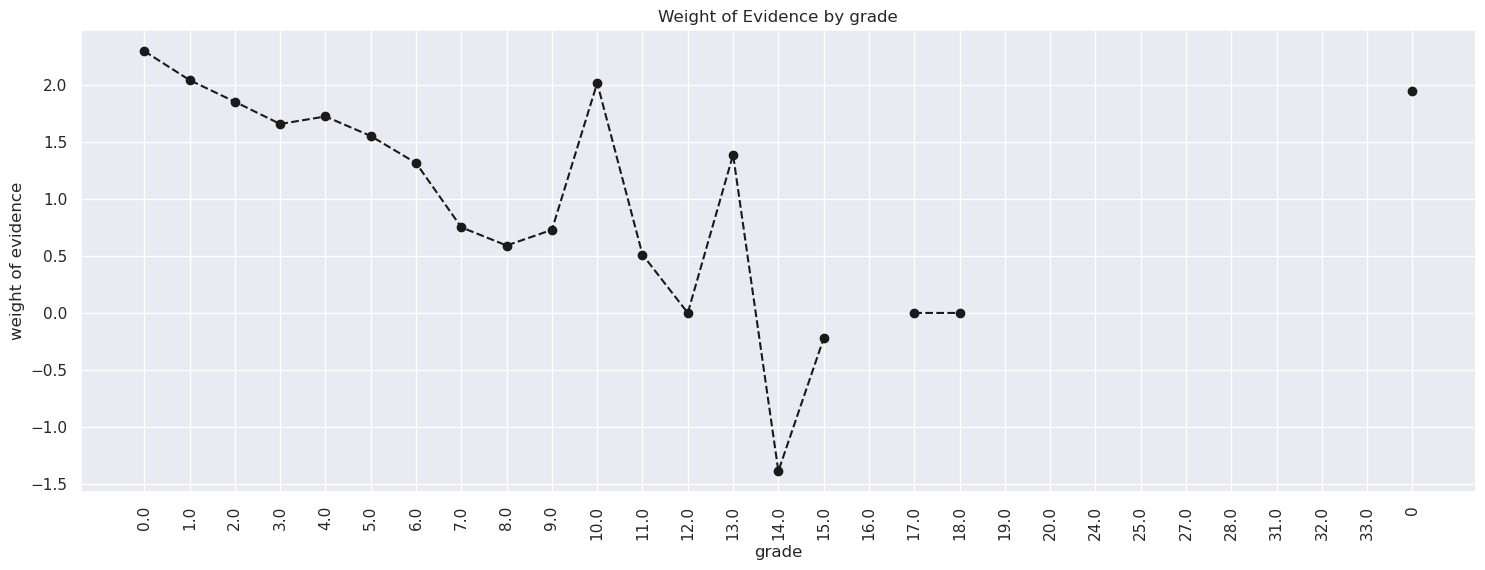

In [708]:
#plot the woe_plot
plot_by_woe(df_temp, 90)


In [709]:
df_inputs_prepr['inq_last_6mths'].head()

427211    1.0
206088    2.0
136020    1.0
412305    3.0
36159     1.0
Name: inq_last_6mths, dtype: object

In [710]:
df_inputs_prepr['inq_last_6mths'] = df_inputs_prepr['inq_last_6mths'].astype(int)


In [711]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['inq_last_6mths:0'] = np.where(df_inputs_prepr['inq_last_6mths'] == 0, 1, 0)
df_inputs_prepr['inq_last_6mths:0-3'] = np.where((df_inputs_prepr['inq_last_6mths'] > 0) & (df_inputs_prepr['inq_last_6mths'] <= 3), 1, 0)
df_inputs_prepr['inq_last_6mths:3-7'] = np.where((df_inputs_prepr['inq_last_6mths'] > 3) & (df_inputs_prepr['inq_last_6mths'] <= 7), 1, 0)
df_inputs_prepr['inq_last_6mths:7-9'] = np.where((df_inputs_prepr['inq_last_6mths'] > 7) & (df_inputs_prepr['inq_last_6mths'] <= 9), 1, 0)
df_inputs_prepr['inq_last_6mths:9-11'] = np.where((df_inputs_prepr['inq_last_6mths'] > 9) & (df_inputs_prepr['inq_last_6mths'] <= 11), 1, 0)
df_inputs_prepr['inq_last_6mths:11-12'] = np.where((df_inputs_prepr['inq_last_6mths'] > 11) & (df_inputs_prepr['inq_last_6mths'] <= 12), 1, 0)
df_inputs_prepr['inq_last_6mths:12-18'] = np.where((df_inputs_prepr['inq_last_6mths'] > 12) & (df_inputs_prepr['inq_last_6mths'] <= 18), 1, 0)
df_inputs_prepr['inq_last_6mths:18'] = np.where(df_inputs_prepr['inq_last_6mths'] > 18, 1, 0)


In [712]:
#convert the 'open_acc' into float and then apply the woe_continuos function

df_inputs_prepr['open_acc'] = df_inputs_prepr['open_acc'].astype(float)
df_temp = woe_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,29,0.758621,0.000078,22.0,7.0,0.000066,0.000021,1.145132,NaN,NaN,inf
1,1.0,110,0.872727,0.000295,96.0,14.0,0.000289,0.000042,1.925291,0.114107,0.780159,inf
2,2.0,1456,0.845467,0.003903,1231.0,225.0,0.003705,0.000677,1.699482,0.027260,0.225809,inf
3,3.0,4378,0.873687,0.011736,3825.0,553.0,0.011512,0.001664,1.933956,0.028220,0.234474,inf
4,4.0,10028,0.891504,0.026883,8940.0,1088.0,0.026907,0.003275,2.106194,0.017817,0.172239,inf
5,5.0,17141,0.891255,0.045951,15277.0,1864.0,0.045980,0.005610,2.103624,0.000249,0.002571,inf
6,6.0,24621,0.892368,0.066003,21971.0,2650.0,0.066128,0.007976,2.115164,0.001113,0.011540,inf
7,7.0,30169,0.891544,0.080876,26897.0,3272.0,0.080954,0.009848,2.106613,0.000824,0.008550,inf
8,8.0,33579,0.891033,0.090017,29920.0,3659.0,0.090053,0.011013,2.101337,0.000511,0.005276,inf
9,9.0,35251,0.889195,0.094500,31345.0,3906.0,0.094342,0.011756,2.082541,0.001838,0.018796,inf


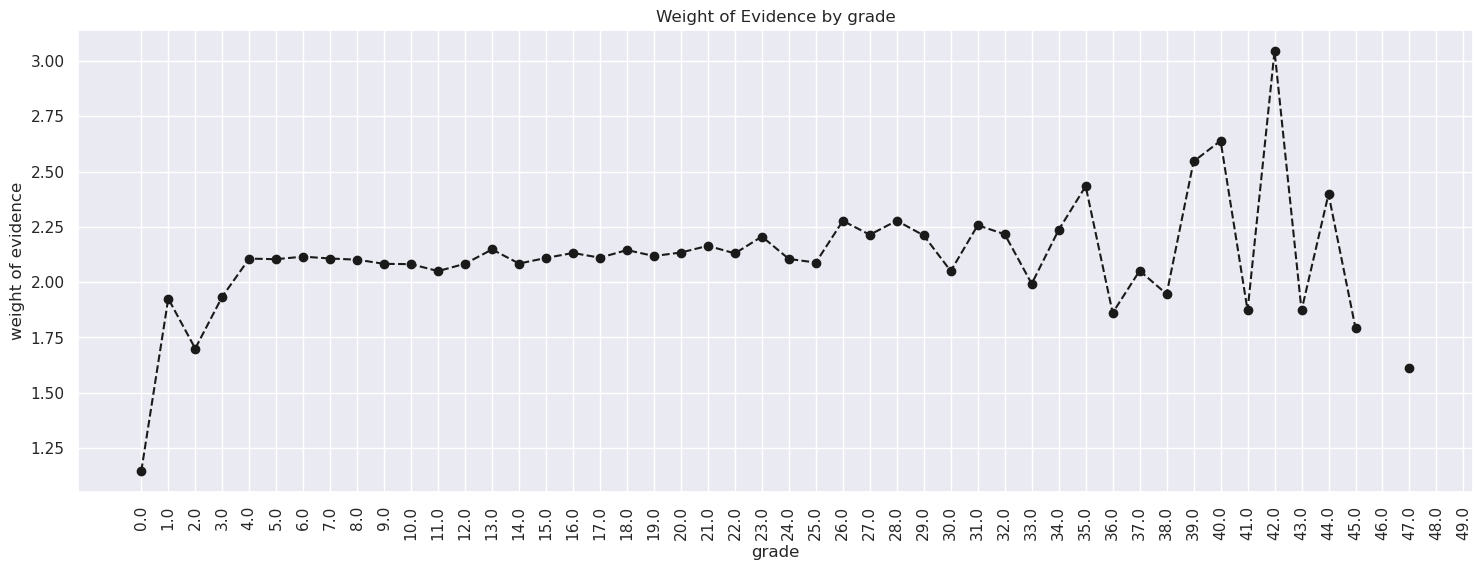

In [713]:
#plot the woe_plot
plot_by_woe(df_temp, 90)

In [714]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:0-1'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 1), 1, 0)
df_inputs_prepr['open_acc:1-4'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 4), 1, 0)
df_inputs_prepr['open_acc:4-28'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 28), 1, 0)
df_inputs_prepr['open_acc:28-35'] = np.where((df_inputs_prepr['open_acc'] >= 28) & (df_inputs_prepr['open_acc'] <= 35), 1, 0)
df_inputs_prepr['open_acc:35-45'] = np.where((df_inputs_prepr['open_acc'] >= 35) & (df_inputs_prepr['open_acc'] <= 45), 1, 0)
df_inputs_prepr['open_acc:>45'] = np.where((df_inputs_prepr['open_acc'] > 45), 1, 0)


In [715]:
#convert the 'pub_rec' into float
df_inputs_prepr['pub_rec'] = df_inputs_prepr['pub_rec'].astype(float)

In [716]:
#apply the woe_continuos function
df_temp = woe_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323999,0.889941,0.868565,288340.0,35659.0,0.867840,0.107326,2.090139,NaN,NaN,0.742466
1,1.0,42381,0.893419,0.113613,37864.0,4517.0,0.113962,0.013595,2.126153,0.003478,0.036014,0.742466
2,2.0,4527,0.903247,0.012136,4089.0,438.0,0.012307,0.001318,2.233837,0.009828,0.107684,0.742466
3,3.0,1280,0.920312,0.003431,1178.0,102.0,0.003546,0.000307,2.446601,0.017065,0.212764,0.742466
4,4.0,408,0.924020,0.001094,377.0,31.0,0.001135,0.000093,2.498258,0.003707,0.051657,0.742466
5,5.0,203,0.911330,0.000544,185.0,18.0,0.000557,0.000054,2.329984,0.012690,0.168274,0.742466
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000328,0.000024,2.611906,0.020294,0.281922,0.742466
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000138,0.000006,3.135494,0.026709,0.523588,0.742466
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000072,0.000000,inf,0.041667,inf,0.742466
9,9.0,14,0.785714,0.000038,11.0,3.0,0.000033,0.000009,1.299283,0.214286,inf,0.742466


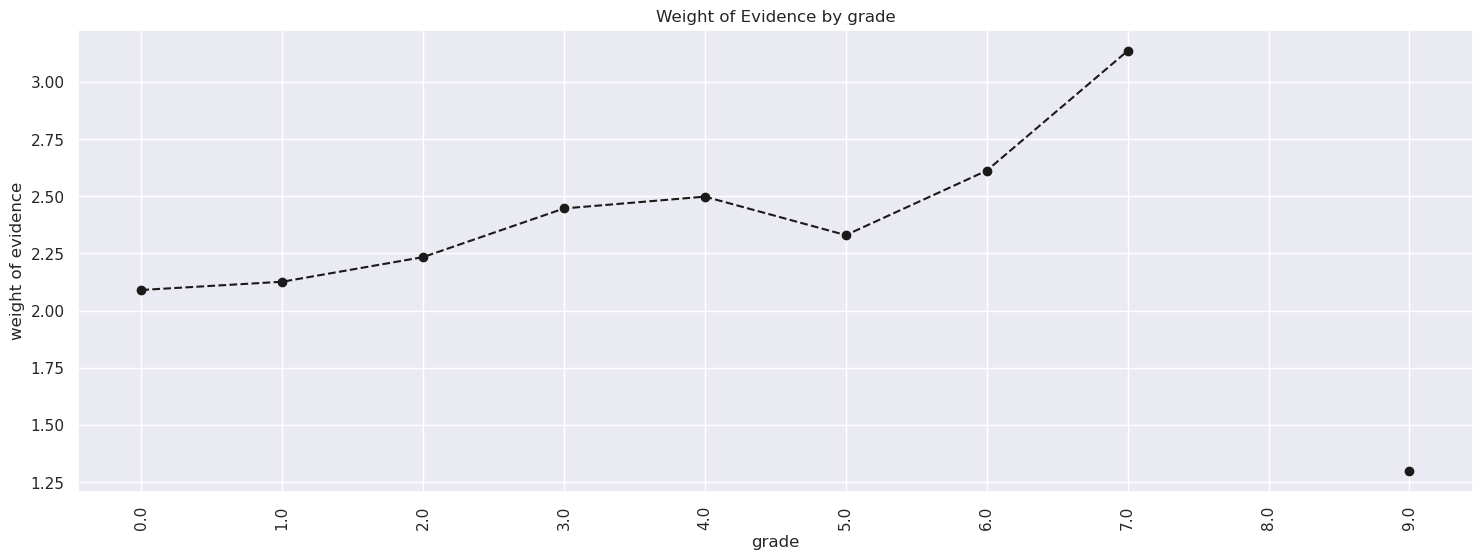

In [717]:
#plot the woe_plot
plot_by_woe(df_temp, 90)

In [718]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['pub_rec:0-3'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 3), 1, 0)
df_inputs_prepr['pub_rec:3-6'] = np.where((df_inputs_prepr['pub_rec'] > 3) & (df_inputs_prepr['pub_rec'] <= 6), 1, 0)
df_inputs_prepr['pub_rec:6-8'] = np.where((df_inputs_prepr['pub_rec'] > 6) & (df_inputs_prepr['pub_rec'] <= 8), 1, 0)
df_inputs_prepr['pub_rec:8'] = np.where(df_inputs_prepr['pub_rec'] > 8, 1, 0)


In [719]:
#convert the 'total_acc' into float
df_inputs_prepr['total_acc'] = df_inputs_prepr['total_acc'].astype(float)


In [720]:
#apply the cut function to create buckets of continuos variables
df_inputs_prepr['total_acc_fac'] = pd.cut(df_inputs_prepr['total_acc'], 50)


In [721]:
#apply the woe_continuos function
df_temp = woe_continuous(df_inputs_prepr, 'total_acc_fac', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.15, 3.0]",459,0.810458,0.001230,372.0,87.0,0.001120,0.000262,1.452986,NaN,NaN,0.743002
1,"(3.0, 6.0]",6004,0.864757,0.016095,5192.0,812.0,0.015627,0.002444,1.855374,0.054299,0.402388,0.743002
2,"(6.0, 9.0]",15047,0.873131,0.040337,13138.0,1909.0,0.039543,0.005746,1.928929,0.008374,0.073555,0.743002
3,"(9.0, 12.0]",25169,0.881283,0.067472,22181.0,2988.0,0.066760,0.008993,2.004632,0.008152,0.075703,0.743002
4,"(12.0, 15.0]",33651,0.881281,0.090210,29656.0,3995.0,0.089258,0.012024,2.004621,0.000001,0.000011,0.743002
5,"(15.0, 18.0]",38711,0.887267,0.103775,34347.0,4364.0,0.103377,0.013135,2.063126,0.005986,0.058505,0.743002
6,"(18.0, 21.0]",40599,0.886155,0.108836,35977.0,4622.0,0.108283,0.013911,2.052052,0.001112,0.011073,0.743002
7,"(21.0, 24.0]",40163,0.891492,0.107668,35805.0,4358.0,0.107765,0.013117,2.106074,0.005337,0.054022,0.743002
8,"(24.0, 27.0]",36286,0.895442,0.097274,32492.0,3794.0,0.097794,0.011419,2.147573,0.003950,0.041499,0.743002
9,"(27.0, 30.0]",31775,0.899103,0.085181,28569.0,3206.0,0.085986,0.009649,2.187298,0.003661,0.039725,0.743002


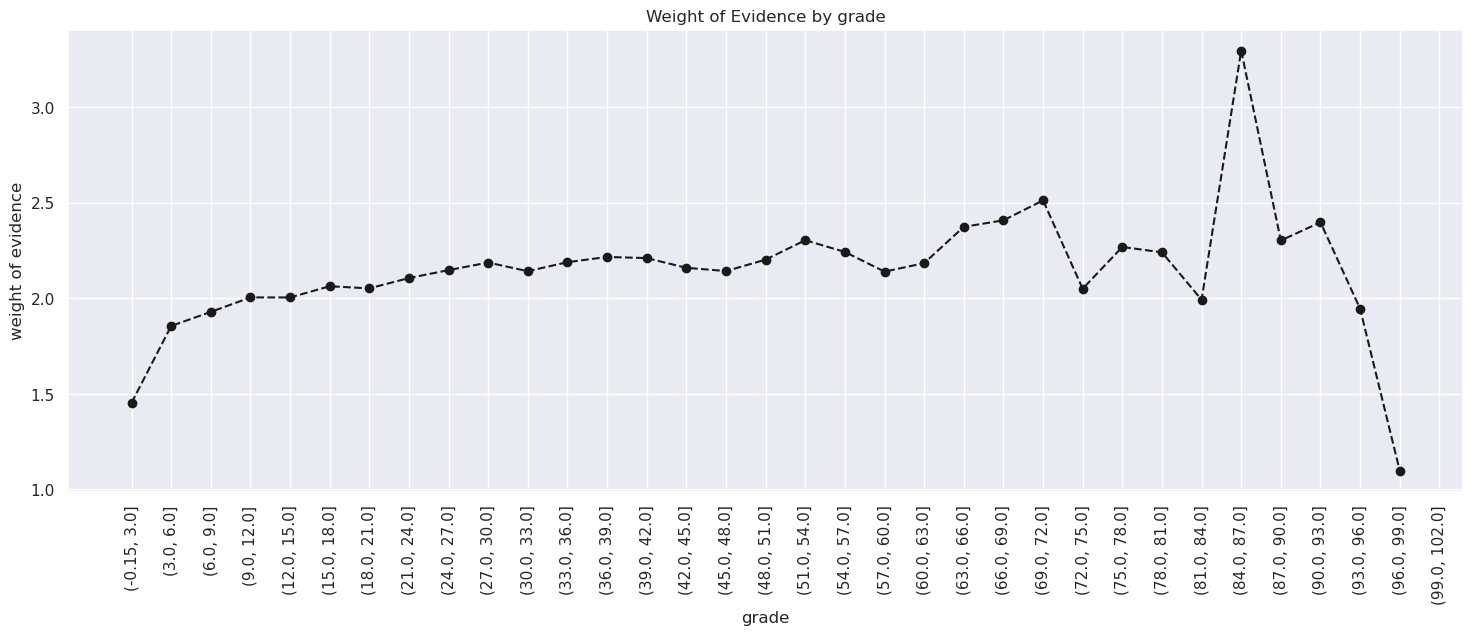

In [722]:
#plot the woe_plot
plot_by_woe(df_temp, 90)


In [723]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['total_acc:<0'] = np.where((df_inputs_prepr['total_acc_fac'] == '<0'), 1, 0)
df_inputs_prepr['total_acc:0-4'] = np.where((df_inputs_prepr['total_acc_fac'] == '0-4'), 1, 0)
df_inputs_prepr['total_acc:4-62'] = np.where((df_inputs_prepr['total_acc_fac'] == '4-62'), 1, 0)
df_inputs_prepr['total_acc:62-72'] = np.where((df_inputs_prepr['total_acc_fac'] == '62-72'), 1, 0)
df_inputs_prepr['total_acc:72-85'] = np.where((df_inputs_prepr['total_acc_fac'] == '72-85'), 1, 0)
df_inputs_prepr['total_acc:>85'] = np.where((df_inputs_prepr['total_acc_fac'] == '>85'), 1, 0)


In [724]:
#convert the 'acc_now_delinq' into float type
df_inputs_prepr['acc_now_delinq'] = df_inputs_prepr['acc_now_delinq'].astype(float)

In [725]:
#apply the woe_continuos function
df_temp = woe_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371682,0.890648,0.996392,331038.0,40644.0,0.996352,0.122330,2.097382,NaN,NaN,0.742535
1,1.0,1263,0.899446,0.003386,1136.0,127.0,0.003419,0.000382,2.191082,0.008797,0.093700,0.742535
2,2.0,70,0.928571,0.000188,65.0,5.0,0.000196,0.000015,2.564949,0.029126,0.373868,0.742535
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000003,1.791759,0.071429,0.773190,0.742535
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.142857,inf,0.742535
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000003,0.000000,0.500000,inf,0.742535


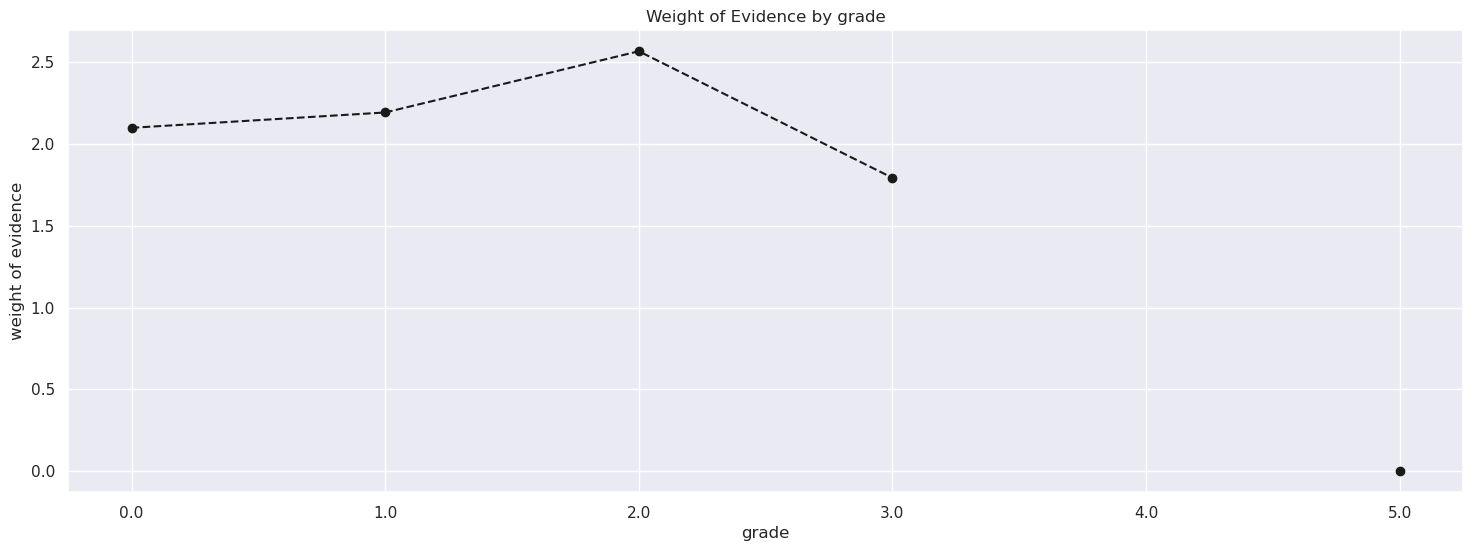

In [726]:
#plot the woe_plot
plot_by_woe(df_temp)


In [727]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['acc_now_delinq_0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq_1'] = np.where((df_inputs_prepr['acc_now_delinq'] == 1), 1, 0)
df_inputs_prepr['acc_now_delinq_2'] = np.where((df_inputs_prepr['acc_now_delinq'] == 2), 1, 0)
df_inputs_prepr['acc_now_delinq_3'] = np.where((df_inputs_prepr['acc_now_delinq'] == 3), 1, 0)
df_inputs_prepr['acc_now_delinq_4'] = np.where((df_inputs_prepr['acc_now_delinq'] == 4), 1, 0)
df_inputs_prepr['acc_now_delinq_5'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 5), 1, 0)

In [728]:
#For 'total_rev_hi_lim' column take only those values which are less than 80000  # Total revolving high credit/credit limit

df_inputs_prepr_temp = df_inputs_prepr[df_inputs_prepr['total_rev_hi_lim'] <= 80000]


In [729]:
#apply the cut and woe_continuos function
df_inputs_prepr['total_rev_hi_lim_factor']=pd.cut(df_inputs_prepr_temp['total_rev_hi_lim'],50)
df_temp=woe_continuous(df_inputs_prepr,'total_rev_hi_lim_factor',df_targets_prepr)

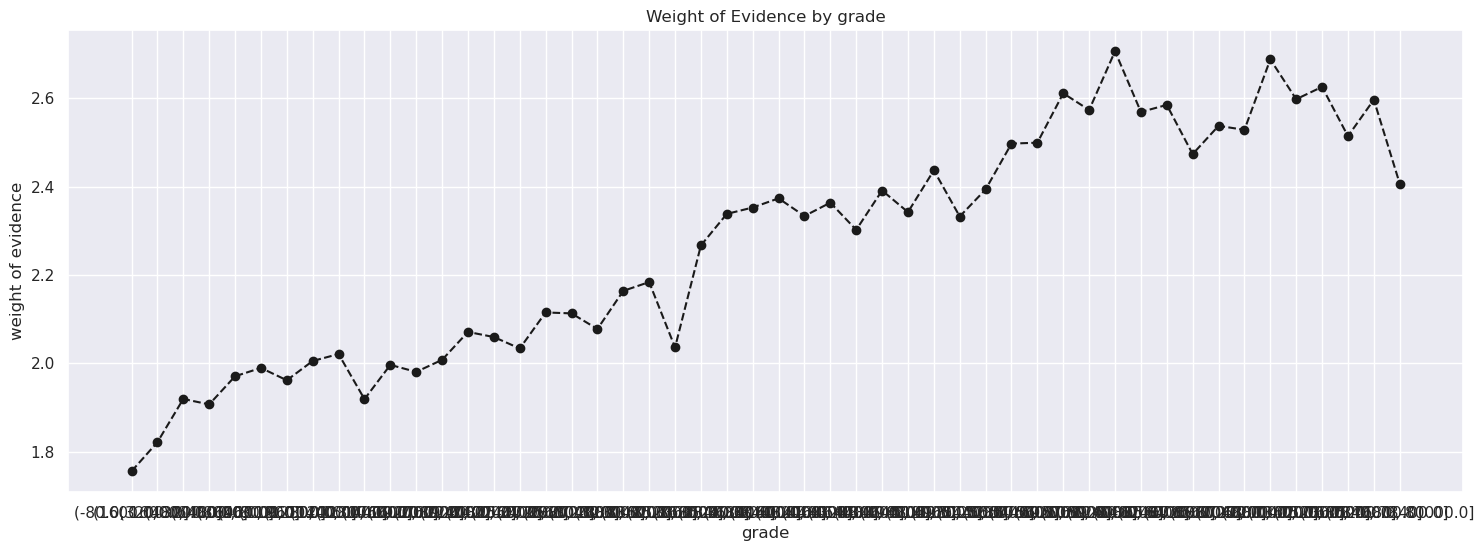

In [730]:
#plot the woe_plot
plot_by_woe(df_temp)


In [731]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['total_rev_hi_lim:<=5k'] = np.where(df_inputs_prepr['total_rev_hi_lim_factor'].isin(['(-0.001, 5000.0]']), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5k_10k'] = np.where(df_inputs_prepr['total_rev_hi_lim_factor'].isin(['(5000.0, 10000.0]']), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10k_20k'] = np.where(df_inputs_prepr['total_rev_hi_lim_factor'].isin(['(10000.0, 20000.0]']), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20k_30k'] = np.where(df_inputs_prepr['total_rev_hi_lim_factor'].isin(['(20000.0, 30000.0]']), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30k_40k'] = np.where(df_inputs_prepr['total_rev_hi_lim_factor'].isin(['(30000.0, 40000.0]']), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40k_50k'] = np.where(df_inputs_prepr['total_rev_hi_lim_factor'].isin(['(40000.0, 50000.0]']), 1, 0)
df_inputs_prepr['total_rev_hi_lim:50k_65k'] = np.where(df_inputs_prepr['total_rev_hi_lim_factor'].isin(['(50000.0, 65000.0]']), 1, 0)
df_inputs_prepr['total_rev_hi_lim:65k_80k'] = np.where(df_inputs_prepr['total_rev_hi_lim_factor'].isin(['(65000.0, 80000.0]']), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>80k'] = np.where(df_inputs_prepr['total_rev_hi_lim_factor'].isin(['(80000.0, 80000.0]']), 1, 0)

In [732]:
#apply the cut and woe_contionus function on 'annual_inc'

df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp=woe_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 73294.82]",231445,0.875901,0.620449,202723.0,28722.0,0.610152,0.086447,1.954177,NaN,NaN,0.744817
1,"(73294.82, 144693.64]",120459,0.912900,0.322922,109967.0,10492.0,0.330977,0.031579,2.349567,0.036998,0.395390,0.744817
2,"(144693.64, 216092.46]",15885,0.925087,0.042584,14695.0,1190.0,0.044229,0.003582,2.513554,0.012187,0.163987,0.744817
3,"(216092.46, 287491.28]",3119,0.927220,0.008361,2892.0,227.0,0.008704,0.000683,2.544754,0.002134,0.031200,0.744817
4,"(287491.28, 358890.1]",1117,0.929275,0.002994,1038.0,79.0,0.003124,0.000238,2.575603,0.002055,0.030850,0.744817
5,"(358890.1, 430288.92]",408,0.933824,0.001094,381.0,27.0,0.001147,0.000081,2.646963,0.004549,0.071359,0.744817
6,"(430288.92, 501687.74]",245,0.946939,0.000657,232.0,13.0,0.000698,0.000039,2.881788,0.013115,0.234826,0.744817
7,"(501687.74, 573086.56]",87,0.919540,0.000233,80.0,7.0,0.000241,0.000021,2.436116,0.027399,0.445672,0.744817
8,"(573086.56, 644485.38]",61,0.868852,0.000164,53.0,8.0,0.000160,0.000024,1.890850,0.050688,0.545266,0.744817
9,"(644485.38, 715884.2]",51,0.901961,0.000137,46.0,5.0,0.000138,0.000015,2.219203,0.033108,0.328353,0.744817


As we can see higher values in annual_inc has very less observation so we will take only those annual income which are less than 140000

In [733]:
#take only those observations which are less than 140000
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<= 140000,:]

In [734]:
#apply the cut and woe_contionus function on 'annual_inc'
# Apply the cut function to create buckets for 'annual_inc'
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

# Apply the woe_continuous function
df_temp = woe_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 73294.82]",231445,0.875901,0.620449,202723.0,28722.0,0.610152,0.086447,1.954177,NaN,NaN,0.744817
1,"(73294.82, 144693.64]",120459,0.912900,0.322922,109967.0,10492.0,0.330977,0.031579,2.349567,0.036998,0.395390,0.744817
2,"(144693.64, 216092.46]",15885,0.925087,0.042584,14695.0,1190.0,0.044229,0.003582,2.513554,0.012187,0.163987,0.744817
3,"(216092.46, 287491.28]",3119,0.927220,0.008361,2892.0,227.0,0.008704,0.000683,2.544754,0.002134,0.031200,0.744817
4,"(287491.28, 358890.1]",1117,0.929275,0.002994,1038.0,79.0,0.003124,0.000238,2.575603,0.002055,0.030850,0.744817
5,"(358890.1, 430288.92]",408,0.933824,0.001094,381.0,27.0,0.001147,0.000081,2.646963,0.004549,0.071359,0.744817
6,"(430288.92, 501687.74]",245,0.946939,0.000657,232.0,13.0,0.000698,0.000039,2.881788,0.013115,0.234826,0.744817
7,"(501687.74, 573086.56]",87,0.919540,0.000233,80.0,7.0,0.000241,0.000021,2.436116,0.027399,0.445672,0.744817
8,"(573086.56, 644485.38]",61,0.868852,0.000164,53.0,8.0,0.000160,0.000024,1.890850,0.050688,0.545266,0.744817
9,"(644485.38, 715884.2]",51,0.901961,0.000137,46.0,5.0,0.000138,0.000015,2.219203,0.033108,0.328353,0.744817


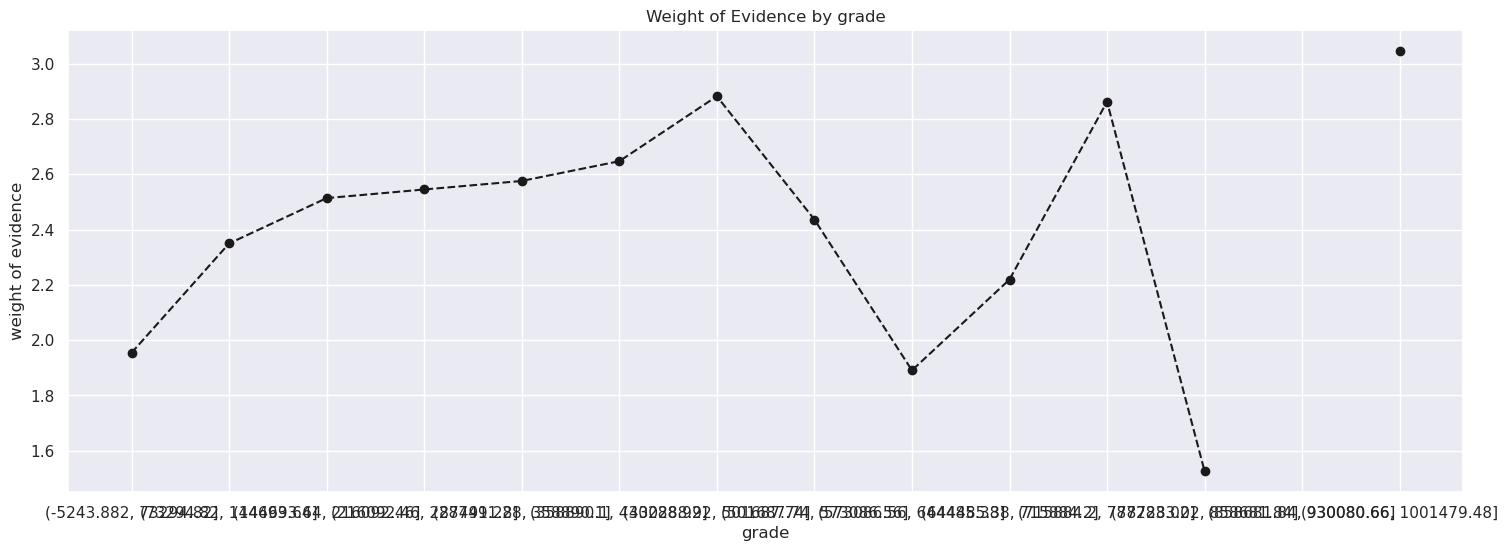

In [735]:
#plot the woe_plot
plot_by_woe(df_temp)

In [736]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['annual_inc:<20k'] = np.where((df_inputs_prepr['annual_inc'] < 20000), 1, 0)
df_inputs_prepr['annual_inc:20k-30k'] = np.where((df_inputs_prepr['annual_inc'] >= 20000) & (df_inputs_prepr['annual_inc'] < 30000), 1, 0)
df_inputs_prepr['annual_inc:30k-40k'] = np.where((df_inputs_prepr['annual_inc'] >= 30000) & (df_inputs_prepr['annual_inc'] < 40000), 1, 0)
df_inputs_prepr['annual_inc:40k-50k'] = np.where((df_inputs_prepr['annual_inc'] >= 40000) & (df_inputs_prepr['annual_inc'] < 50000), 1, 0)
df_inputs_prepr['annual_inc:50k-60k'] = np.where((df_inputs_prepr['annual_inc'] >= 50000) & (df_inputs_prepr['annual_inc'] < 60000), 1, 0)
df_inputs_prepr['annual_inc:60k-70k'] = np.where((df_inputs_prepr['annual_inc'] >= 60000) & (df_inputs_prepr['annual_inc'] < 70000), 1, 0)
df_inputs_prepr['annual_inc:70k-80k'] = np.where((df_inputs_prepr['annual_inc'] >= 70000) & (df_inputs_prepr['annual_inc'] < 80000), 1, 0)
df_inputs_prepr['annual_inc:80k-90k'] = np.where((df_inputs_prepr['annual_inc'] >= 80000) & (df_inputs_prepr['annual_inc'] < 90000), 1, 0)
df_inputs_prepr['annual_inc:90k-100k'] = np.where((df_inputs_prepr['annual_inc'] >= 90000) & (df_inputs_prepr['annual_inc'] < 100000), 1, 0)
df_inputs_prepr['annual_inc:100k-120k'] = np.where((df_inputs_prepr['annual_inc'] >= 100000) & (df_inputs_prepr['annual_inc'] < 120000), 1, 0)
df_inputs_prepr['annual_inc:120k-140k'] = np.where((df_inputs_prepr['annual_inc'] >= 120000) & (df_inputs_prepr['annual_inc'] < 140000), 1, 0)
df_inputs_prepr['annual_inc:>140k'] = np.where((df_inputs_prepr['annual_inc'] >= 140000), 1, 0)

In [737]:
#apply the cut and woe_continuos function on 'mths_since_last_delinq'

# 'mths_since_last_delinq' has null values, so take only the notnull values
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]

# Apply the cut and woe_continuous function on 'mths_since_last_delinq'
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr)

/tmp/ipykernel_32/4080501684.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


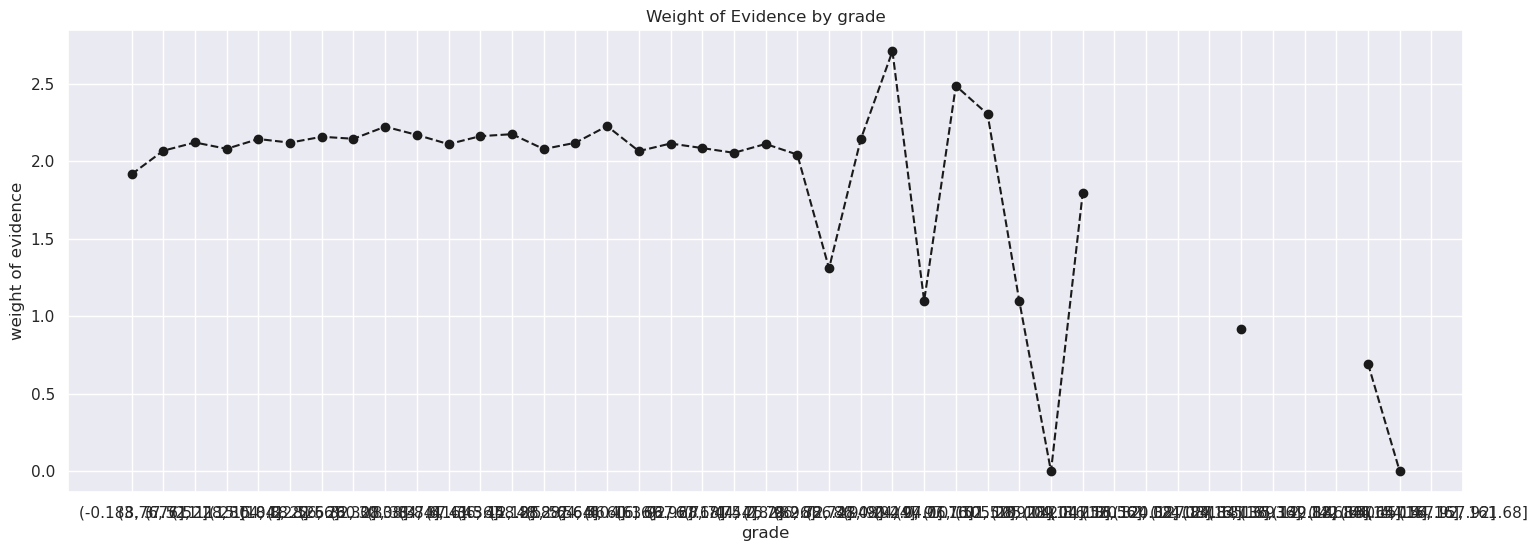

In [738]:
# Plot the WoE plot for 'mths_since_last_delinq'
plot_by_woe(df_temp)


In [739]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where(pd.isnull(df_inputs_prepr['mths_since_last_delinq']), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where(df_inputs_prepr['mths_since_last_delinq'] >= 57, 1, 0)


In [740]:
#apply the cut function on 'dti_factor'
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 50)

In [741]:
#apply the woe_continuos function
df_temp = woe_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)


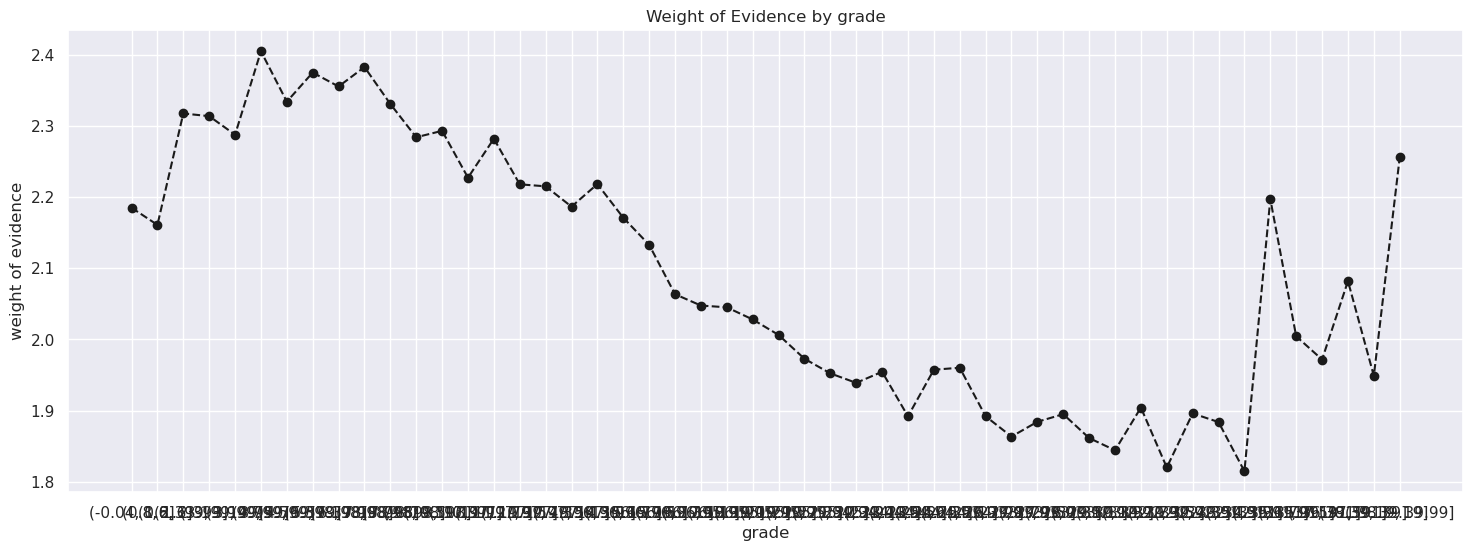

In [742]:
#plot the woe_plot
plot_by_woe(df_temp)


In [743]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

# Create binary encoded columns based on WoE values
df_inputs_prepr['dti:<5'] = np.where((df_inputs_prepr['dti'] <= 5), 1, 0)
df_inputs_prepr['dti:5-10'] = np.where((df_inputs_prepr['dti'] > 5) & (df_inputs_prepr['dti'] <= 10), 1, 0)
df_inputs_prepr['dti:10-15'] = np.where((df_inputs_prepr['dti'] > 10) & (df_inputs_prepr['dti'] <= 15), 1, 0)
df_inputs_prepr['dti:15-20'] = np.where((df_inputs_prepr['dti'] > 15) & (df_inputs_prepr['dti'] <= 20), 1, 0)
df_inputs_prepr['dti:20-25'] = np.where((df_inputs_prepr['dti'] > 20) & (df_inputs_prepr['dti'] <= 25), 1, 0)
df_inputs_prepr['dti:25-30'] = np.where((df_inputs_prepr['dti'] > 25) & (df_inputs_prepr['dti'] <= 30), 1, 0)
df_inputs_prepr['dti:30-35'] = np.where((df_inputs_prepr['dti'] > 30) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:35-40'] = np.where((df_inputs_prepr['dti'] > 35) & (df_inputs_prepr['dti'] <= 40), 1, 0)
df_inputs_prepr['dti:>40'] = np.where((df_inputs_prepr['dti'] > 40), 1, 0)

In [744]:
#'mths_since_last_record' has null values so take only the notnull values
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

#apply the cut function
df_inputs_prepr_temp['mths_since_last_record']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)


/tmp/ipykernel_32/3505199854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)


In [745]:
# Filter out rows with non-null 'mths_since_last_record'
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

# Apply the cut function to 'mths_since_last_record'
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

# Apply the woe_continuous function
df_temp = woe_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr)



/tmp/ipykernel_32/2285581219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


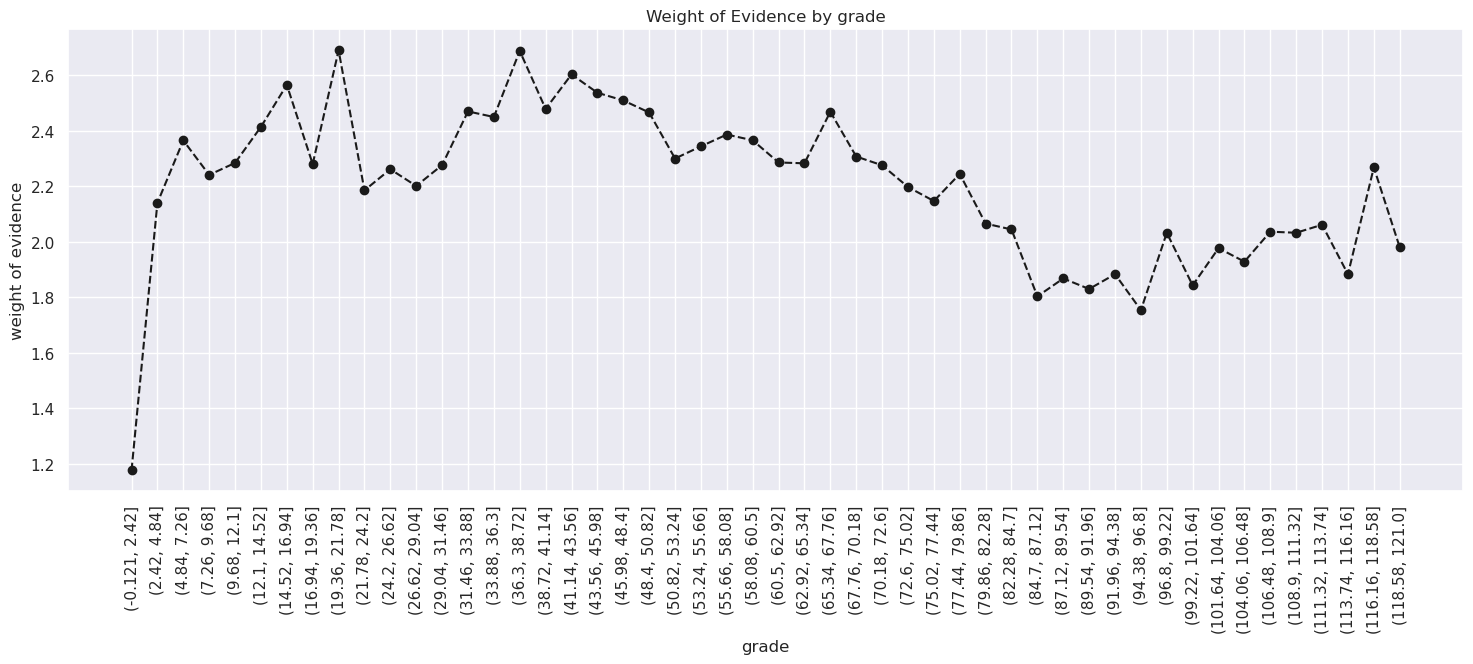

In [746]:
#plot the woe_plot
plot_by_woe(df_temp, 90)


In [747]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_last_record:Missing'] = np.where(pd.isnull(df_inputs_prepr['mths_since_last_record']), 1, 0)
df_inputs_prepr['mths_since_last_record:0-90'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 90), 1, 0)
df_inputs_prepr['mths_since_last_record:90-120'] = np.where((df_inputs_prepr['mths_since_last_record'] > 90) & (df_inputs_prepr['mths_since_last_record'] <= 120), 1, 0)
df_inputs_prepr['mths_since_last_record:120-127'] = np.where((df_inputs_prepr['mths_since_last_record'] > 120) & (df_inputs_prepr['mths_since_last_record'] <= 127), 1, 0)
df_inputs_prepr['mths_since_last_record:>=127'] = np.where(df_inputs_prepr['mths_since_last_record'] > 127, 1, 0)

In [748]:
#assigning the dataframe into a new variable
loan_data_inputs_train= df_inputs_prepr

In [749]:
loan_data_inputs_train.shape

(373028, 339)

In [750]:
load_ds_targets_train.shape

(373028,)

In [751]:
loan_data_inputs_test= df_inputs_prepr

In [752]:
loan_data_inputs_test.shape

(373028, 339)

In [753]:
load_ds_targets_test.shape

(93257,)

In [754]:
#import the preprosess dataframe into a new csv file

loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
load_ds_targets_train.to_csv('loan_data_targets_train.csv')

loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
load_ds_targets_test.to_csv('loan_data_targets_test.csv')